In [1]:
#Library Used in all Code
import numpy as np
import pandas as pd

#Used In Rule of Mixtures
import pymatgen as pymat
import mendeleev as mendel

#Random
np.random.seed(44) # Random Seed1
import random

# PLOTTING (MATPLOTLIB)
%matplotlib inline
import matplotlib.animation as animation
from IPython.display import HTML

# PLOTTING (PLOTLY)
import plotly 
import plotly.graph_objs as go
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

# ML
from lolopy.learners import RandomForestRegressor

# Meltheas TOOL
from simtool import findInstalledSimToolNotebooks, searchForSimTool
from simtool import getSimToolInputs, getSimToolOutputs, Run

MeltHEA = searchForSimTool('meltheas')
from IPython.display import clear_output
from IPython.display import display
from hublib.ui import FileUpload
import ipywidgets as widgets
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

<IPython.core.display.Javascript object>

# Import Initial Dataset 

In [2]:
#Get initial set for testing data
initial_data = pd.read_csv('NewSmallCompistionDataSet.csv')
initial_data = initial_data.drop(['Solid Tm'], axis=1)
initial_data = initial_data.drop(['Liquid Tm'], axis=1)
initial_data = initial_data.drop(['Minus'], axis=1)
initial_data = initial_data.drop(['Plus'], axis=1)
initial_data = initial_data.drop(['Unnamed: 0'], axis=1)
compared_df = initial_data.drop(['Simulated Tm'], axis=1)
#display(initial_data)

# All Plausible Compisition Creator

In [3]:
#Create lines to get values with .1 step size
nx = 11
x1 = np.linspace(0, 1, nx)
y, y1, y2, y3, y4 = np.meshgrid(x1, x1, x1, x1, x1)
positions = np.vstack([y.ravel(), y1.ravel(), y2.ravel(), y3.ravel(), y4.ravel()]).T

#Make dataframe with limits of all possible compistions combinations
all_permutations = pd.DataFrame(positions)
all_permutations["sum"]= all_permutations.sum(axis = 1)
plausible_compositions = all_permutations[all_permutations["sum"] == 1]

plausible_compositions = plausible_compositions[plausible_compositions[0] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[1] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[2] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[3] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[4] <= 0.5]

plausible_compositions = plausible_compositions.round(1)

plausible_compositions = plausible_compositions.drop(["sum"], axis = 1)
initial_plausible_compositions = plausible_compositions
#display(plausible_compositions)

# Apply Rule of Mixtures to Compositions

In [4]:
#string to select characteristics
actual_qued_values = ['youngs_modulus', 'atomic_radius', 'electrical_resistivity','CTE','hardness','boiling_point',
                         'atomic_mass','poissons_ratio','density_of_solid','en_gosh','melting_point']

sample = ['Cr', 'Co', 'Cu', 'Fe', 'Ni']

def get_discriptors(input_string,sample):
    #dictionary values to choose from
    string_dict = ['bulk_modulus','youngs_modulus','CTE','thermal_conductivity','boiling_point','critical_temperature',
                  'vdw_radius','average_ionic_radius','atomic_radius','atomic_number','atomic_mass','molar_volume', 
                   'density_of_solid','hardness','poissons_ratio','period','group','en_gosh','electrical_resistivity', 'melting_point']

    #Creation of dictionary
    data_set = {}

    #Make dict of lists
    for length_string in range(len(string_dict)):
        data_set[string_dict[length_string]] = []

    #all plausbile compositions from before
    df2 = plausible_compositions

    #list of all things
    que_values = []

    for item in sample:
        element_object = pymat.Element(item)
        data_set[string_dict[0]].append(element_object.bulk_modulus) #bulk_modulus
        data_set[string_dict[1]].append(element_object.youngs_modulus) #youngs_modulus
        data_set[string_dict[2]].append(element_object.coefficient_of_linear_thermal_expansion) #CTE
        data_set[string_dict[3]].append(element_object.thermal_conductivity) #thermal conductivity
        data_set[string_dict[4]].append(element_object.boiling_point) #boiling_point
        data_set[string_dict[5]].append(element_object.critical_temperature) #critical temperature
        data_set[string_dict[6]].append(element_object.van_der_waals_radius) #vander wall radius
        data_set[string_dict[7]].append(element_object.average_ionic_radius) #average ionic radius
        data_set[string_dict[8]].append(element_object.atomic_radius) #atomic radius
        data_set[string_dict[9]].append(element_object.Z) #atomic number
        data_set[string_dict[10]].append(element_object.atomic_mass) #atomic mass
        data_set[string_dict[11]].append(element_object.molar_volume) #molar volume
        data_set[string_dict[12]].append(element_object.density_of_solid) #density_solid
        data_set[string_dict[13]].append(element_object.brinell_hardness) #brinell_hardness
        data_set[string_dict[14]].append(element_object.poissons_ratio) #poissons_ratio
        data_set[string_dict[15]].append(element_object.row) #period
        data_set[string_dict[16]].append(element_object.group) #group
        data_set[string_dict[17]].append(element_object.X) #en_gosh
        data_set[string_dict[18]].append(element_object.electrical_resistivity) #electrical_resistivity
        data_set[string_dict[19]].append(element_object.melting_point) #melting_point

    for discript in input_string:
        que_values.append(data_set[discript])

    df = pd.DataFrame(data = que_values, columns = sample, index = input_string) 
    display(df)
    return df

discriptors_df = get_discriptors(actual_qued_values,sample)

Cr            Co            Cu  \
youngs_modulus          2.790000e+02  2.090000e+02  1.300000e+02   
atomic_radius           1.400000e+00  1.350000e+00  1.350000e+00   
electrical_resistivity  1.270000e-07  6.000000e-08  1.720000e-08   
CTE                     4.900000e-06  1.300000e-05  1.650000e-05   
hardness                1.120000e+03  7.000000e+02  8.740000e+02   
boiling_point           2.944000e+03  3.200000e+03  3.200000e+03   
atomic_mass             5.199610e+01  5.893319e+01  6.354600e+01   
poissons_ratio          2.100000e-01  3.100000e-01  3.400000e-01   
density_of_solid        7.140000e+03  8.900000e+03  8.920000e+03   
en_gosh                 1.660000e+00  1.880000e+00  1.900000e+00   
melting_point           2.180000e+03  1.768000e+03  1.357770e+03   

                                  Fe            Ni  
youngs_modulus          2.110000e+02  2.000000e+02  
atomic_radius           1.400000e+00  1.350000e+00  
electrical_resistivity  1.000000e-07  7.200000e-08  
CTE                     1.180000e-05  1.340000e-05  
hardness                4.900000e+02  7.000000e+02  
boiling_point           3.134000e+03  3.186000e+03  
atomic_mass             5.584500e+01  5.869340e+01  
poissons_ratio          2.900000e-01  3.100000e-01  
density_of_solid        7.874000e+03  8.908000e+03  
en_gosh                 1.830000e+00  1.910000e+00  
melting_point           1.811000e+03  1.728000e+03

In [ ]:
#Rename df to match other dataframes
plausible_compositions = plausible_compositions.rename(columns = {0:'Cr',1:'Co',2:'Cu',3:'Fe', 4:'Ni'})

#Taking out replicas
df = pd.merge(plausible_compositions, compared_df, how='left', indicator = 'Exsist')
df = df[df['Exsist'] != 'both']
plausible_compositions = df.drop(['Exsist'], axis = 1)

#display(plausible_compositions)

# Applying Rule of Mixture

In [ ]:
#Applu Rule of Mixtures
def rule_mixtures(df2,df,sample): 
    #Creator column of first rule mixture discriptor to concat to
    cr = 0
    for comps in sample:
        cr = cr+df2[comps]*df[comps][0]
    cr = cr.to_frame()

    #Concat rest of compistions with rule of mixtures applied
    for x in range(1,len(actual_qued_values)):
        cf = 0
        for comps in sample:
            cf = cf + df2[comps]*df[comps][x]
        cf.to_frame()
        cr = pd.concat([cr,cf], axis=1)

    #Renames columns to discriptors
    cr.columns = actual_qued_values
    return cr

plausible_compositions_rule_mixtures = rule_mixtures(plausible_compositions,discriptors_df,sample)
known_compositions_rule_mixtures = rule_mixtures(compared_df,discriptors_df,sample)
#display(plausible_compositions_rule_mixtures)

# Data Preperation

In [ ]:
#Concatinate values
all_rule_mixtures = pd.concat([known_compositions_rule_mixtures,plausible_compositions_rule_mixtures])
all_compositions = pd.concat([compared_df,plausible_compositions])

#Experimental melting temperatures [K]
T_m_Cr = 2180
T_m_Co = 1768
T_m_Cu = 1358
T_m_Fe = 1811
T_m_Ni = 1728

#display(all_compositions)

In [ ]:
#Set testing and training data
all_values = all_rule_mixtures.values.tolist()
all_labels = initial_data['Simulated Tm'].tolist()

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow (Normalization).
all_values = np.array(all_values, dtype = float)
all_labels = np.array(all_labels, dtype = float)

create_label = np.zeros((plausible_compositions_rule_mixtures.shape[0],), dtype = int)
all_labels = np.concatenate((all_labels,create_label), axis = 0)
#display(all_compositions)

# Getting CSVS for Sequential Learning

In [ ]:
import glob
import os
import os.path, time

list_seq_learn = []

#path = '/home/nanohub/dfarache/Random_Active_Learn/Untitled Folder/'
path = os.getcwd()

print(path)

list_of_files = sorted(os.listdir(path), key=os.path.getctime)
for docs in list_of_files:
    if 'melting_8labels' in docs:
        list_seq_learn.append(docs)
print(list_seq_learn)

/home/nanohub/dfarache/Random_Active_Learn/Untitled Folder/200picoRuns_RandomSeeds/Random_datasetCreatorForPaper
['Random_melting_8labels50pico0.csv', 'Random_melting_8labels50pico1.csv', 'Random_melting_8labels50pico2.csv', 'Random_melting_8labels200pico2.csv', 'Random_melting_8labels50pico4.csv', 'Random_melting_8labels200pico5.csv']


# Random Forest Creation and Prediction

In [ ]:
X = all_values.copy() #discriptors
y = all_labels.copy() #all labels  

# assign values
model = RandomForestRegressor(num_trees = 350) #model if iterate through
#print(model.__init__)

entry_number_init = initial_data.shape[0] #starting point of initial data
in_train = np.zeros(len(X), dtype=np.bool) #make all false

in_train[:entry_number_init] = True #turns false to true 

#in_train[np.where(y!=0)] = True

print('Picked {} training entries'.format(in_train.sum()))

nsamples = in_train.sum()
train_fraction = 0.8
train_idx = int(train_fraction*nsamples)

print (X.shape, y.shape)


#Get previous runs of sequential and use them
if list_seq_learn:
    y_counter = 0
    seq_learn_data = pd.read_csv(list_seq_learn[-1])
    for val in seq_learn_data['Index']:
        in_train[val] = True
        y[val] = seq_learn_data['Simulated Tm'][y_counter]
        y_counter = y_counter + 1
    
    

# Uncomment the line below to shuffle the dataset (we do not do this here to ensure consistent results for every run)
#order = np.argsort(np.random.random(all_labels.shape)) # This numpy argsort returns the indexes that would be used to shuffle a list
#order = np.arange(nsamples)
#all_values = all_values[0:nsamples][order]
#all_labels = all_labels[0:nsamples][order]

model.fit(X[:train_idx, :], y[:train_idx])
test_pred, test_std = model.predict(X[train_idx:nsamples, :], return_std=True)
pred, std = model.predict(X, return_std=True)
#print(in_train)

Picked 39 training entries
(593, 11) (593,)


In [ ]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

layout0= go.Layout(title= "Melting Temperature", hovermode= 'closest',
    xaxis= dict(title= 'Real Values',zeroline= False, gridwidth= 2),
    yaxis= dict(title= 'Predictions',zeroline= False, gridwidth= 2), height=800, width=800, font=dict(size=22))

testing= go.Scatter(x = y[train_idx:nsamples], y = test_pred, mode = 'markers', marker= dict(size= 14, color= 'red', symbol = 'x'), 
                    name= "Testing Data", error_y=dict(type='data', array=test_std,visible=True))
everything = go.Scatter(x = y[:nsamples], y = pred, mode = 'markers', marker= dict(size= 14, color= 'blue', symbol = 'x'), 
                        name= "All Data", error_y=dict(type='data', array=std,visible=True))
match = go.Scatter(x = [1700,2300], y = [1700,2300], mode = 'lines', name = "Match", line= dict( color = 'black', dash='dash'))

traces = [everything,testing,match]
fig= go.Figure(traces, layout=layout0)
fig.update_yaxes(automargin=True)
iplot(fig)
#print(model.__dict__)

# Applying Acquisition Function

83
-------------------------------------------------------------
Experiment #  0
335
[0.1, 0.2, 0.3, 0.0, 0.4]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/82e831b832c44dd189d2f96bdb9259cc/inputs.yaml
       RUNS/82e831b832c44dd189d2f96bdb9259cc
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/82e831b832c44dd189d2f96bdb9259cc/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:25<00:00, 188.22s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/82e831b832c44dd189d2f96bdb9259cc/inputs.yaml
       RUNS/82e831b832c44dd189d2f96bdb9259cc
Predicted melting temperature for this potential:  1934.5846823970037
95% confidence interval:  1.276798371575489
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9895833333333334
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 1.400e+01 1.000e+00 2.600e+01 1.000e+00 4.560e+03 4.608e+03]


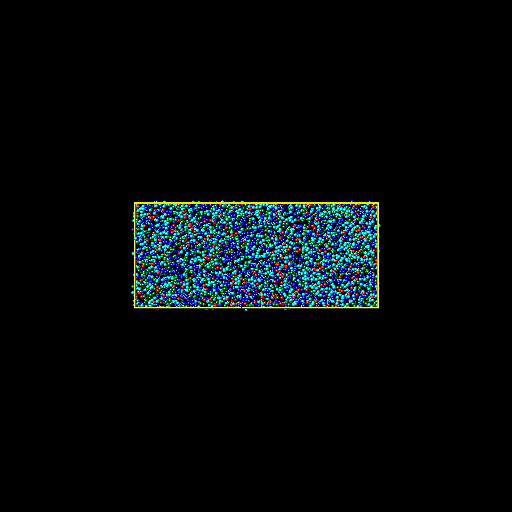

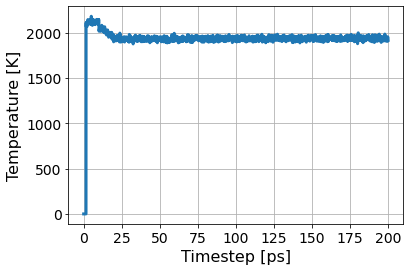

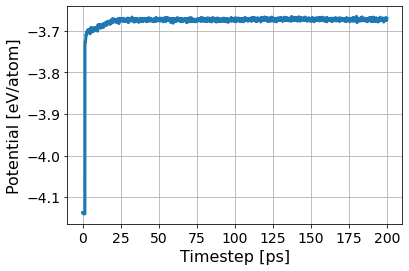

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0004b5d62b0e4abcb32f9bef5c492a2c/inputs.yaml
       RUNS/0004b5d62b0e4abcb32f9bef5c492a2c
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0004b5d62b0e4abcb32f9bef5c492a2c/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:32<00:00, 188.51s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0004b5d62b0e4abcb32f9bef5c492a2c/inputs.yaml
       RUNS/0004b5d62b0e4abcb32f9bef5c492a2c
Predicted melting temperature for this potential:  1839.3533533083644
95% confidence interval:  1.2928529852084167
Fraction of system solid:  0.001736111111111111
Fraction of system liquid:  0.9874131944444444
Simulation Success Flag 0.0
Crystal Structure Info:  [8.000e+00 2.300e+01 1.000e+00 2.600e+01 0.000e+00 4.550e+03 4.608e+03]


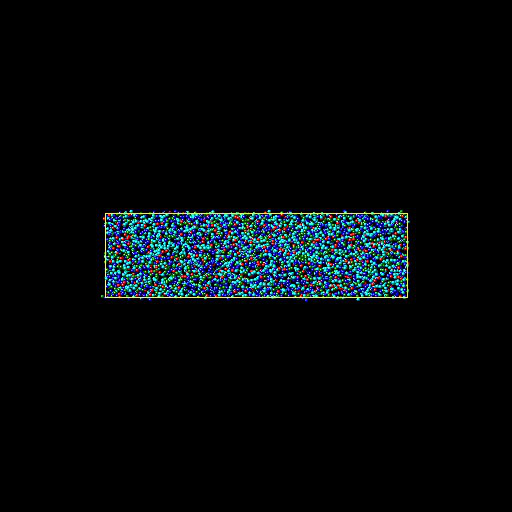

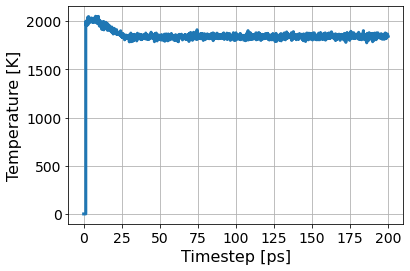

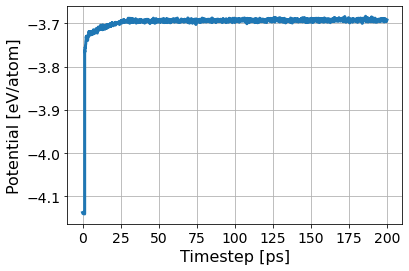

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/27fecaa2598c46ca81b2abe7afb33dd0/inputs.yaml
       RUNS/27fecaa2598c46ca81b2abe7afb33dd0
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/27fecaa2598c46ca81b2abe7afb33dd0/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:19:33<00:00, 190.95s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/27fecaa2598c46ca81b2abe7afb33dd0/inputs.yaml
       RUNS/27fecaa2598c46ca81b2abe7afb33dd0
Predicted melting temperature for this potential:  1838.4549026217226
95% confidence interval:  1.495807567459492
Fraction of system solid:  0.20638020833333334
Fraction of system liquid:  0.7799479166666666
Simulation Success Flag 0.0
Crystal Structure Info:  [9.510e+02 4.200e+01 1.400e+01 6.000e+00 1.000e+00 3.594e+03 4.608e+03]


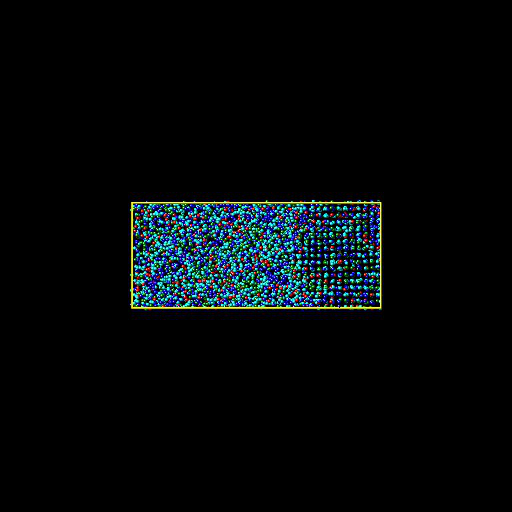

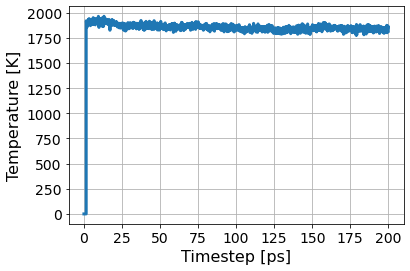

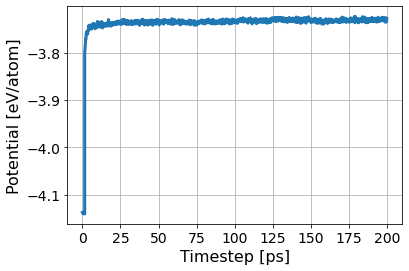

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/dd9f5baba0de404a967281dda32d21bd/inputs.yaml
       RUNS/dd9f5baba0de404a967281dda32d21bd
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/dd9f5baba0de404a967281dda32d21bd/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:19:17<00:00, 190.31s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/dd9f5baba0de404a967281dda32d21bd/inputs.yaml
       RUNS/dd9f5baba0de404a967281dda32d21bd
Predicted melting temperature for this potential:  1863.4664325842693
95% confidence interval:  1.2917732473343115
Fraction of system solid:  0.4759114583333333
Fraction of system liquid:  0.5078125
Simulation Success Flag 1.0
Crystal Structure Info:  [2193.   46.   18.   11.    0. 2340. 4608.]


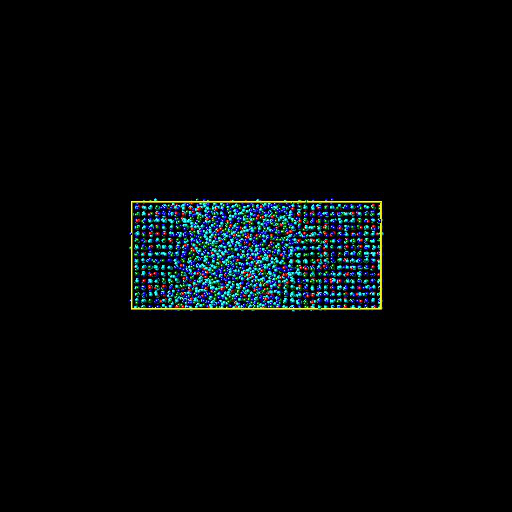

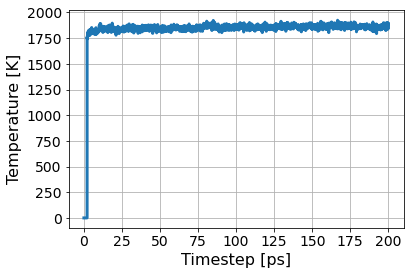

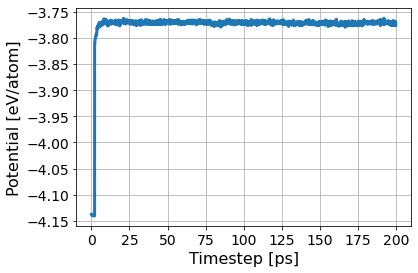

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  1
572
[0.1, 0.5, 0.2, 0.1, 0.1]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8b9ae4762d5249e2bd6c881213cb3dd8/inputs.yaml
       RUNS/8b9ae4762d5249e2bd6c881213cb3dd8
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/8b9ae4762d5249e2bd6c881213cb3dd8/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:15<00:00, 187.83s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8b9ae4762d5249e2bd6c881213cb3dd8/inputs.yaml
       RUNS/8b9ae4762d5249e2bd6c881213cb3dd8
Predicted melting temperature for this potential:  2070.3030985018727
95% confidence interval:  1.427226639989365
Fraction of system solid:  0.0015190972222222222
Fraction of system liquid:  0.9884982638888888
Simulation Success Flag 0.0
Crystal Structure Info:  [7.000e+00 2.200e+01 2.000e+00 2.100e+01 1.000e+00 4.555e+03 4.608e+03]


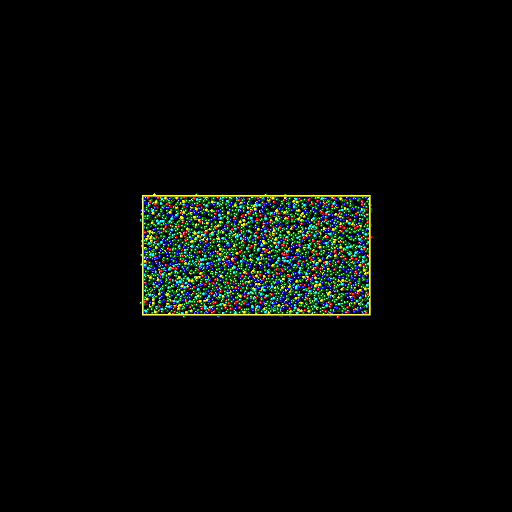

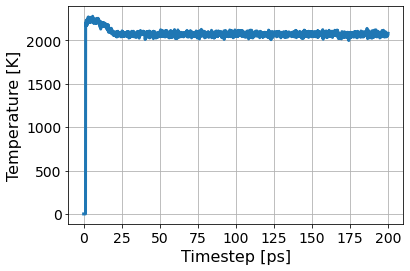

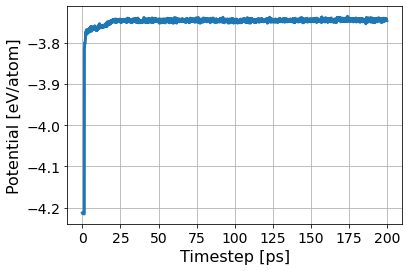

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/26c0dd17436c4c6aa48bdf16479a0781/inputs.yaml
       RUNS/26c0dd17436c4c6aa48bdf16479a0781
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/26c0dd17436c4c6aa48bdf16479a0781/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:10<00:00, 187.63s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/26c0dd17436c4c6aa48bdf16479a0781/inputs.yaml
       RUNS/26c0dd17436c4c6aa48bdf16479a0781
Predicted melting temperature for this potential:  1966.0933551810238
95% confidence interval:  1.2825948281138346
Fraction of system solid:  0.001736111111111111
Fraction of system liquid:  0.9856770833333334
Simulation Success Flag 0.0
Crystal Structure Info:  [8.000e+00 2.900e+01 5.000e+00 2.300e+01 1.000e+00 4.542e+03 4.608e+03]


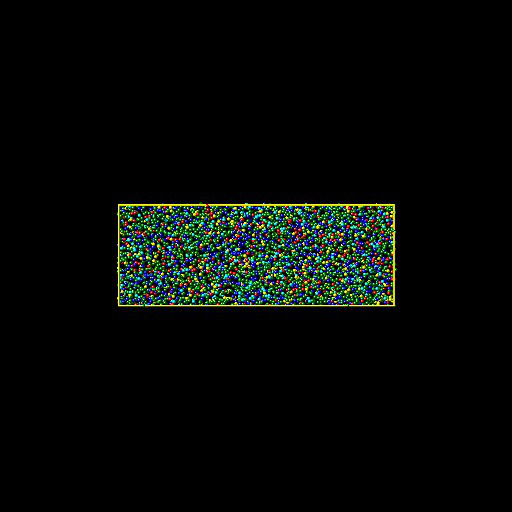

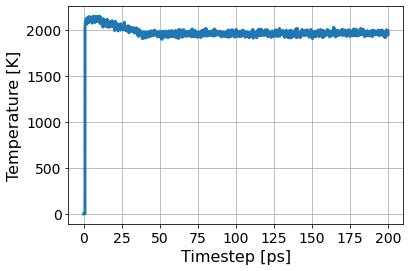

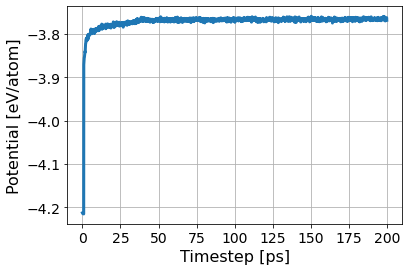

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0abdf5cb57154ffc906ad972fe7904b4/inputs.yaml
       RUNS/0abdf5cb57154ffc906ad972fe7904b4
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0abdf5cb57154ffc906ad972fe7904b4/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:35<00:00, 188.63s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0abdf5cb57154ffc906ad972fe7904b4/inputs.yaml
       RUNS/0abdf5cb57154ffc906ad972fe7904b4
Predicted melting temperature for this potential:  2017.2442627965047
95% confidence interval:  1.607550710079785
Fraction of system solid:  0.3138020833333333
Fraction of system liquid:  0.6566840277777778
Simulation Success Flag 0.0
Crystal Structure Info:  [1446.   77.   49.   10.    0. 3026. 4608.]


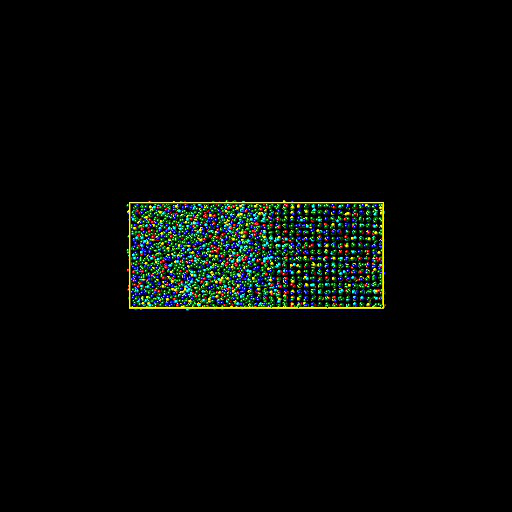

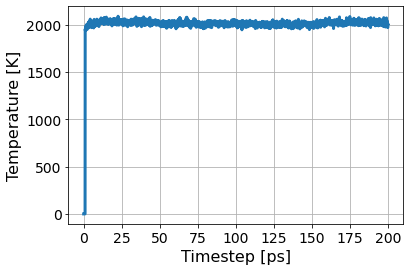

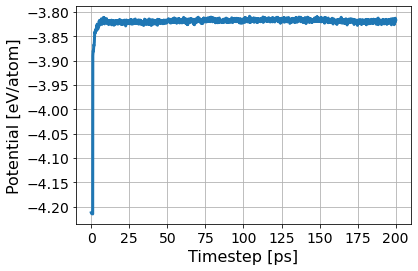

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e9b0ab9da1d9484dafa9d99391c0f443/inputs.yaml
       RUNS/e9b0ab9da1d9484dafa9d99391c0f443
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/e9b0ab9da1d9484dafa9d99391c0f443/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:19:38<00:00, 191.15s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e9b0ab9da1d9484dafa9d99391c0f443/inputs.yaml
       RUNS/e9b0ab9da1d9484dafa9d99391c0f443
Predicted melting temperature for this potential:  2022.180070287141
95% confidence interval:  1.4805884030427683
Fraction of system solid:  0.5509982638888888
Fraction of system liquid:  0.4231770833333333
Simulation Success Flag 1.0
Crystal Structure Info:  [2.539e+03 7.300e+01 3.800e+01 7.000e+00 1.000e+00 1.950e+03 4.608e+03]


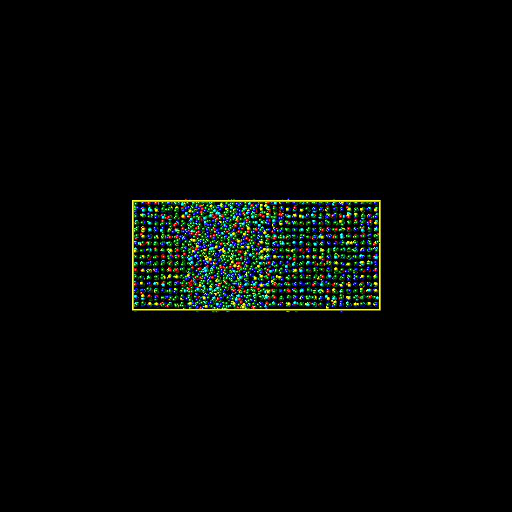

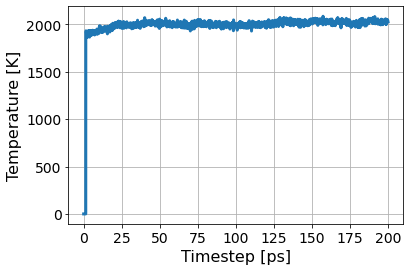

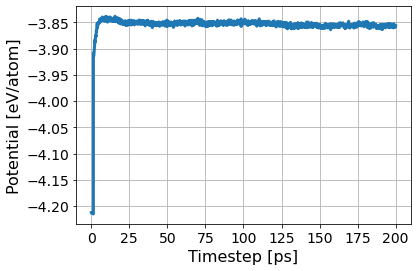

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  2
149
[0.4, 0.0, 0.2, 0.4, 0.0]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a5144b2e1ad34916b5feb68374242a7e/inputs.yaml
       RUNS/a5144b2e1ad34916b5feb68374242a7e
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/a5144b2e1ad34916b5feb68374242a7e/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:06<00:00, 177.86s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a5144b2e1ad34916b5feb68374242a7e/inputs.yaml
       RUNS/a5144b2e1ad34916b5feb68374242a7e
Predicted melting temperature for this potential:  2342.0928563046195
95% confidence interval:  1.523646314751078
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.9928385416666666
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 1.900e+01 1.000e+00 1.100e+01 0.000e+00 4.575e+03 4.608e+03]


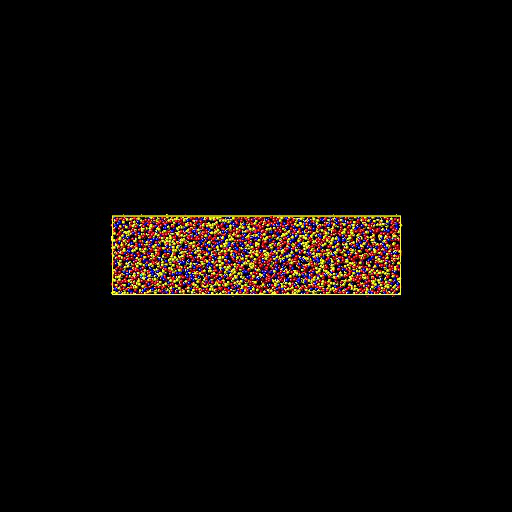

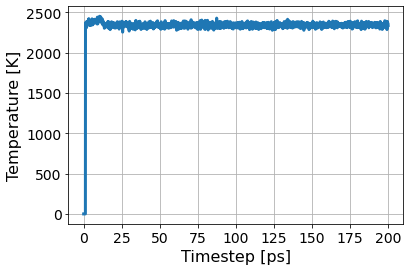

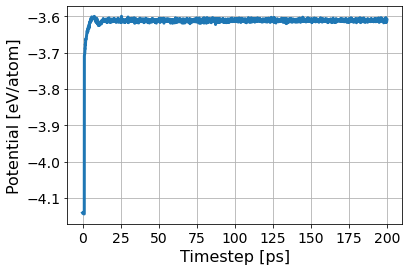

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/414b88abcd5045589741f1bc27f8f36b/inputs.yaml
       RUNS/414b88abcd5045589741f1bc27f8f36b
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/414b88abcd5045589741f1bc27f8f36b/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:01<00:00, 180.06s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/414b88abcd5045589741f1bc27f8f36b/inputs.yaml
       RUNS/414b88abcd5045589741f1bc27f8f36b
Predicted melting temperature for this potential:  2154.7082349563048
95% confidence interval:  1.3874883354717908
Fraction of system solid:  0.0008680555555555555
Fraction of system liquid:  0.98828125
Simulation Success Flag 0.0
Crystal Structure Info:  [4.000e+00 1.700e+01 2.000e+00 3.100e+01 0.000e+00 4.554e+03 4.608e+03]


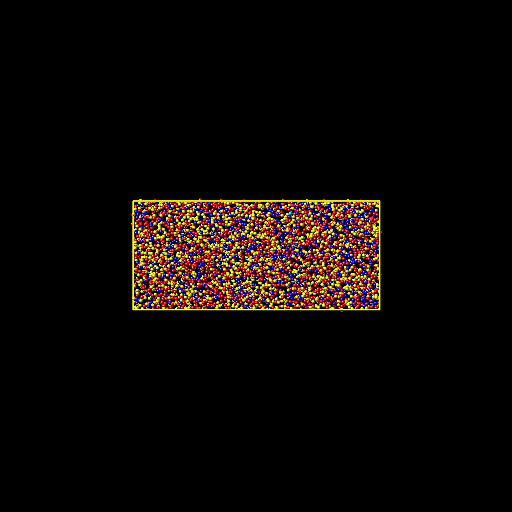

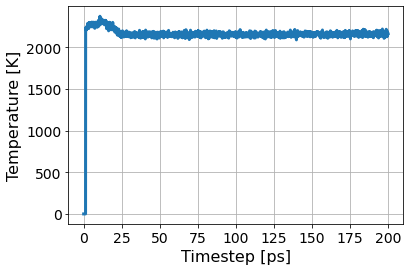

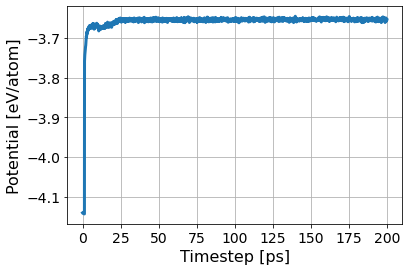

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e32ecdfba25e4990b9dec734c7ede888/inputs.yaml
       RUNS/e32ecdfba25e4990b9dec734c7ede888
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/e32ecdfba25e4990b9dec734c7ede888/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:04<00:00, 180.18s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e32ecdfba25e4990b9dec734c7ede888/inputs.yaml
       RUNS/e32ecdfba25e4990b9dec734c7ede888
Predicted melting temperature for this potential:  2032.4543122347065
95% confidence interval:  1.3362667745978631
Fraction of system solid:  0.0008680555555555555
Fraction of system liquid:  0.984375
Simulation Success Flag 0.0
Crystal Structure Info:  [4.000e+00 3.500e+01 1.000e+00 3.200e+01 0.000e+00 4.536e+03 4.608e+03]


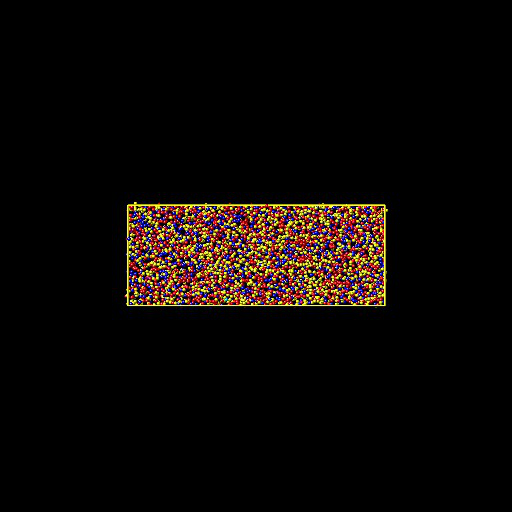

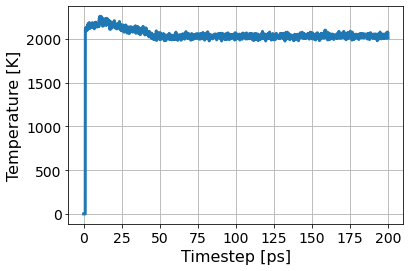

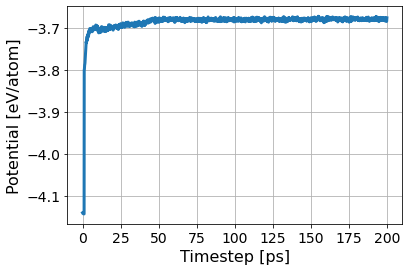

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/aff813482515438d802032a3ac99ac50/inputs.yaml
       RUNS/aff813482515438d802032a3ac99ac50
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/aff813482515438d802032a3ac99ac50/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:25<00:00, 181.02s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/aff813482515438d802032a3ac99ac50/inputs.yaml
       RUNS/aff813482515438d802032a3ac99ac50
Predicted melting temperature for this potential:  2128.310847940075
95% confidence interval:  1.6637287093521889
Fraction of system solid:  0.4259982638888889
Fraction of system liquid:  0.5627170138888888
Simulation Success Flag 1.0
Crystal Structure Info:  [1.963e+03 2.500e+01 1.600e+01 1.000e+01 1.000e+00 2.593e+03 4.608e+03]


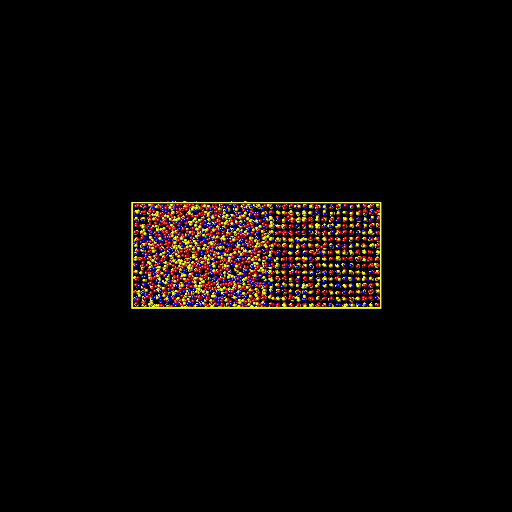

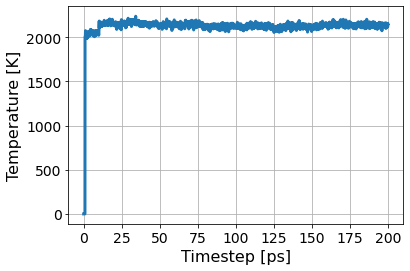

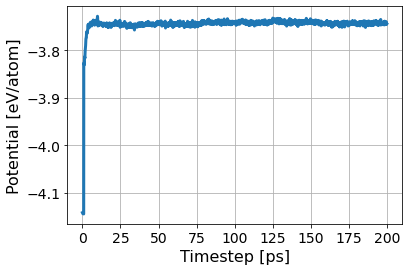

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  3
119
[0.3, 0.0, 0.2, 0.0, 0.5]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ba5ae016c276455099165277344b0383/inputs.yaml
       RUNS/ba5ae016c276455099165277344b0383
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/ba5ae016c276455099165277344b0383/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:52<00:00, 179.70s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ba5ae016c276455099165277344b0383/inputs.yaml
       RUNS/ba5ae016c276455099165277344b0383
Predicted melting temperature for this potential:  1960.6498843945067
95% confidence interval:  1.3075198215074495
Fraction of system solid:  0.0008680555555555555
Fraction of system liquid:  0.9904513888888888
Simulation Success Flag 0.0
Crystal Structure Info:  [4.000e+00 1.700e+01 2.000e+00 2.000e+01 1.000e+00 4.564e+03 4.608e+03]


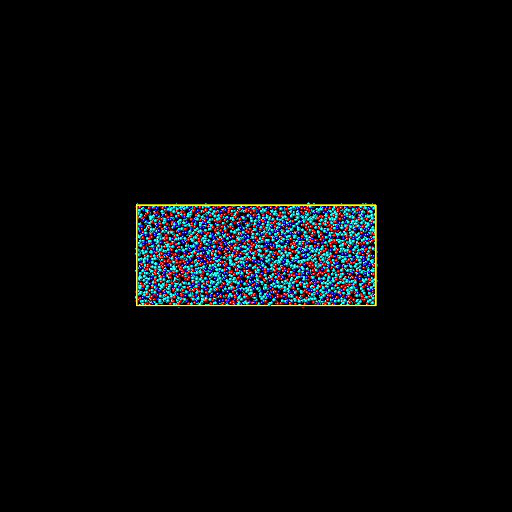

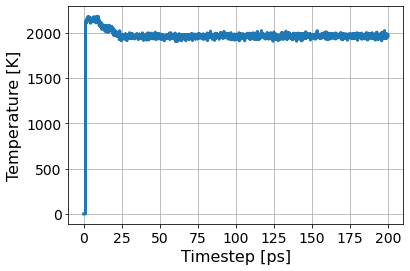

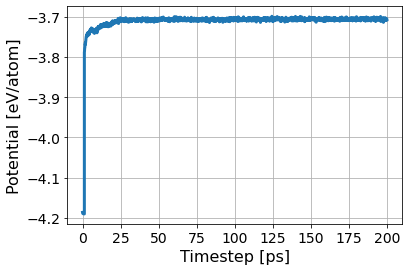

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2a2e5df4f27740abb5d33d70faac0825/inputs.yaml
       RUNS/2a2e5df4f27740abb5d33d70faac0825
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/2a2e5df4f27740abb5d33d70faac0825/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:03<00:00, 182.54s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2a2e5df4f27740abb5d33d70faac0825/inputs.yaml
       RUNS/2a2e5df4f27740abb5d33d70faac0825
Predicted melting temperature for this potential:  1845.7638124843947
95% confidence interval:  1.2243139850699833
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9874131944444444
Simulation Success Flag 0.0
Crystal Structure Info:  [   6.   16.    0.   36.    0. 4550. 4608.]


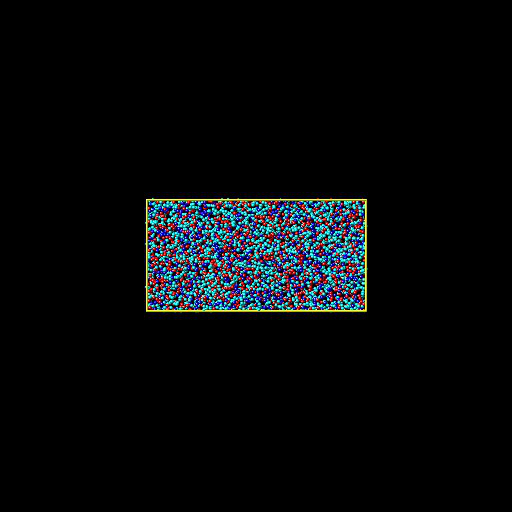

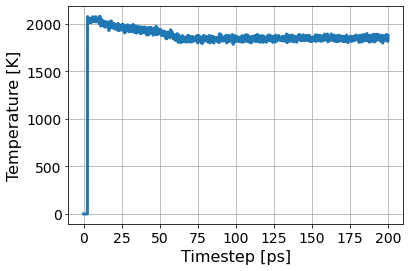

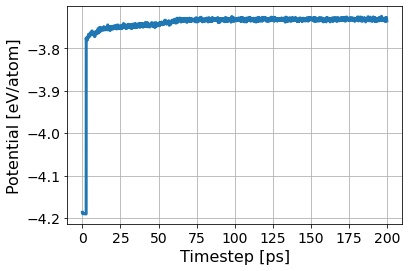

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b02bb6964fc44f788a7e36d4b259b9cd/inputs.yaml
       RUNS/b02bb6964fc44f788a7e36d4b259b9cd
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/b02bb6964fc44f788a7e36d4b259b9cd/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:12<00:00, 185.31s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b02bb6964fc44f788a7e36d4b259b9cd/inputs.yaml
       RUNS/b02bb6964fc44f788a7e36d4b259b9cd
Predicted melting temperature for this potential:  1884.419493133583
95% confidence interval:  1.5355208458411538
Fraction of system solid:  0.3127170138888889
Fraction of system liquid:  0.6753472222222222
Simulation Success Flag 0.0
Crystal Structure Info:  [1441.   26.    8.   21.    0. 3112. 4608.]


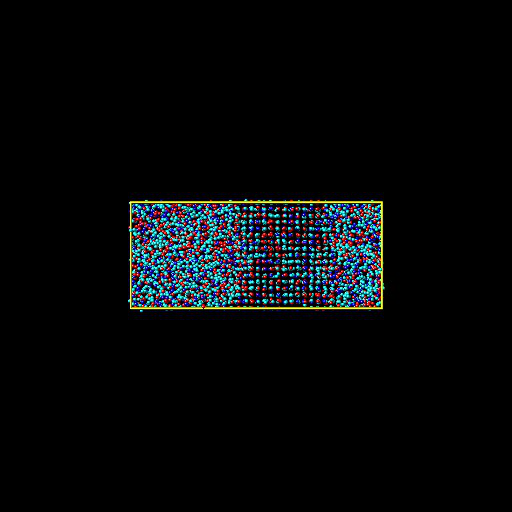

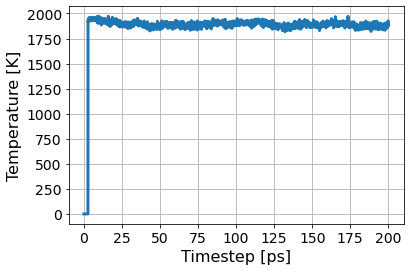

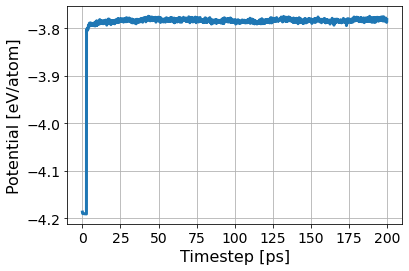

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/cf929da7e375446883282cadae1fd9f0/inputs.yaml
       RUNS/cf929da7e375446883282cadae1fd9f0
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/cf929da7e375446883282cadae1fd9f0/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:29<00:00, 185.98s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/cf929da7e375446883282cadae1fd9f0/inputs.yaml
       RUNS/cf929da7e375446883282cadae1fd9f0
Predicted melting temperature for this potential:  1926.465713857678
95% confidence interval:  1.4439142308192559
Fraction of system solid:  0.5590277777777778
Fraction of system liquid:  0.4273003472222222
Simulation Success Flag 1.0
Crystal Structure Info:  [2.576e+03 5.000e+01 1.100e+01 2.000e+00 0.000e+00 1.969e+03 4.608e+03]


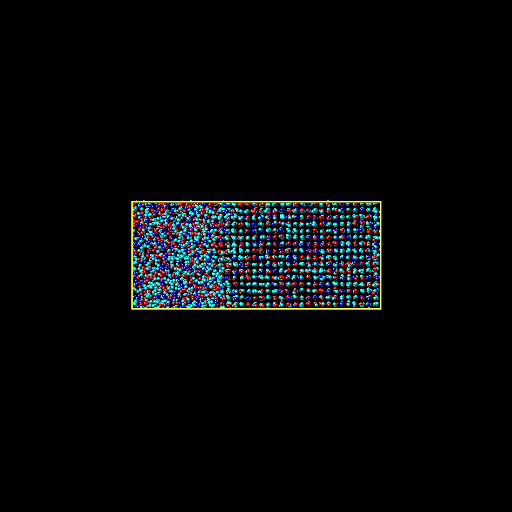

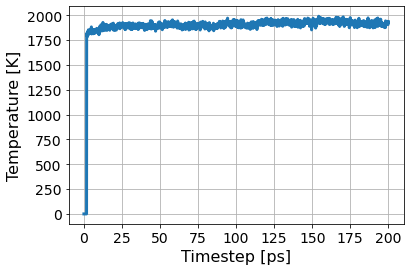

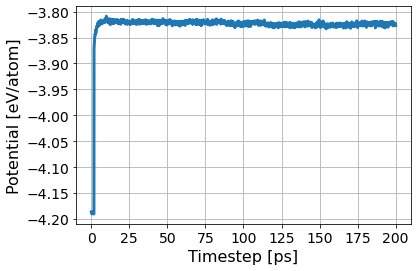

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  4
535
[0.4, 0.4, 0.0, 0.1, 0.1]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/32f6ca2d23c54bf897c93e1083128d90/inputs.yaml
       RUNS/32f6ca2d23c54bf897c93e1083128d90
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/32f6ca2d23c54bf897c93e1083128d90/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:35<00:00, 186.23s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/32f6ca2d23c54bf897c93e1083128d90/inputs.yaml
       RUNS/32f6ca2d23c54bf897c93e1083128d90
Predicted melting temperature for this potential:  2176.4260776529336
95% confidence interval:  1.414265637849659
Fraction of system solid:  0.001736111111111111
Fraction of system liquid:  0.9898003472222222
Simulation Success Flag 0.0
Crystal Structure Info:  [8.000e+00 1.500e+01 3.000e+00 1.900e+01 2.000e+00 4.561e+03 4.608e+03]


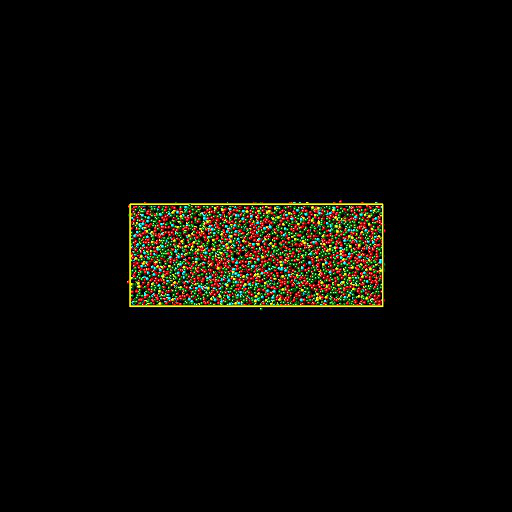

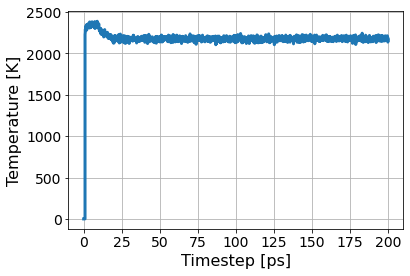

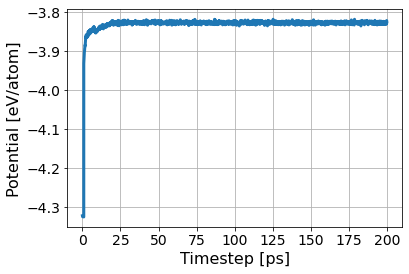

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8aa9c3ec620c48a3b0c976674c4a63dd/inputs.yaml
       RUNS/8aa9c3ec620c48a3b0c976674c4a63dd
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/8aa9c3ec620c48a3b0c976674c4a63dd/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:35<00:00, 186.23s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8aa9c3ec620c48a3b0c976674c4a63dd/inputs.yaml
       RUNS/8aa9c3ec620c48a3b0c976674c4a63dd
Predicted melting temperature for this potential:  2056.4652759051182
95% confidence interval:  1.2942924589288287
Fraction of system solid:  0.001953125
Fraction of system liquid:  0.986328125
Simulation Success Flag 0.0
Crystal Structure Info:  [9.000e+00 2.600e+01 2.000e+00 2.500e+01 1.000e+00 4.545e+03 4.608e+03]


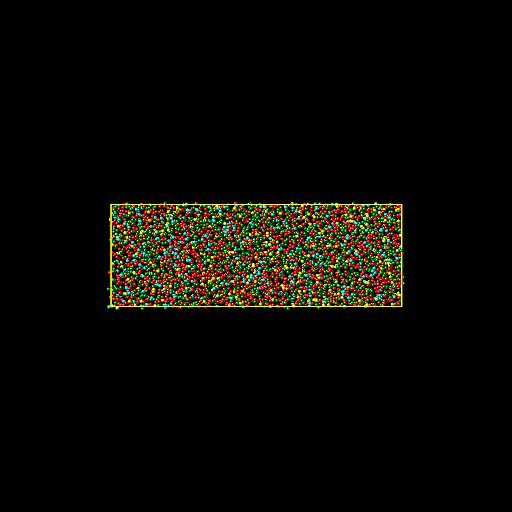

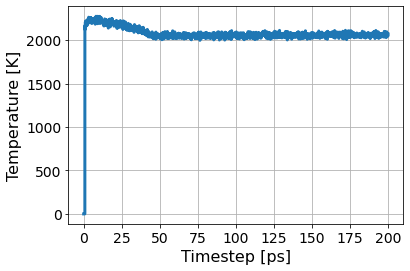

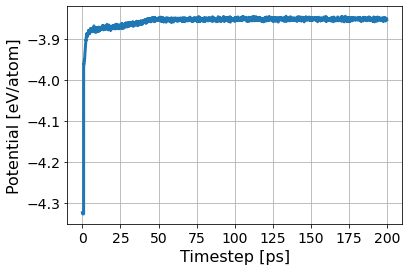

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2d71a7cc44bc4bfab52918f10ad3d380/inputs.yaml
       RUNS/2d71a7cc44bc4bfab52918f10ad3d380
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/2d71a7cc44bc4bfab52918f10ad3d380/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:45<00:00, 186.62s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2d71a7cc44bc4bfab52918f10ad3d380/inputs.yaml
       RUNS/2d71a7cc44bc4bfab52918f10ad3d380
Predicted melting temperature for this potential:  2131.2136079900124
95% confidence interval:  1.6680793934190512
Fraction of system solid:  0.4092881944444444
Fraction of system liquid:  0.5724826388888888
Simulation Success Flag 1.0
Crystal Structure Info:  [1886.   52.   22.   10.    0. 2638. 4608.]


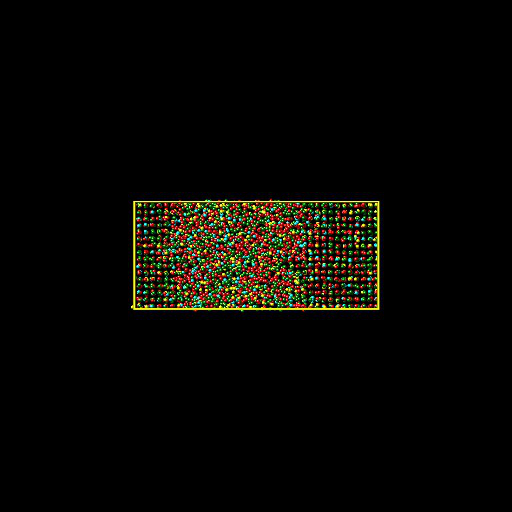

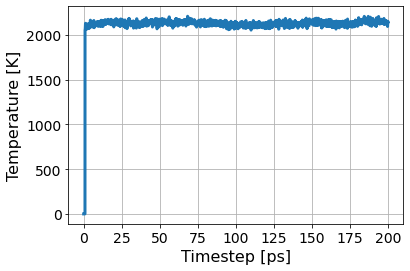

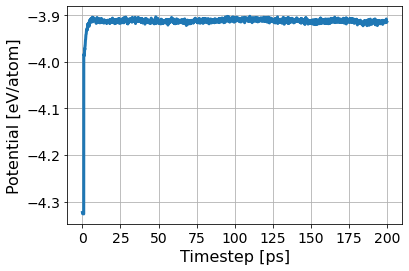

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  5
173
[0.5, 0.0, 0.3, 0.1, 0.1]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/facf3cf000c5402e9d33e730ad3f1b6f/inputs.yaml
       RUNS/facf3cf000c5402e9d33e730ad3f1b6f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/facf3cf000c5402e9d33e730ad3f1b6f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:40<00:00, 179.22s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/facf3cf000c5402e9d33e730ad3f1b6f/inputs.yaml
       RUNS/facf3cf000c5402e9d33e730ad3f1b6f
Predicted melting temperature for this potential:  1992.2541548064917
95% confidence interval:  1.3897294602215067
Fraction of system solid:  0.001736111111111111
Fraction of system liquid:  0.9911024305555556
Simulation Success Flag 0.0
Crystal Structure Info:  [8.000e+00 1.100e+01 2.000e+00 1.900e+01 1.000e+00 4.567e+03 4.608e+03]


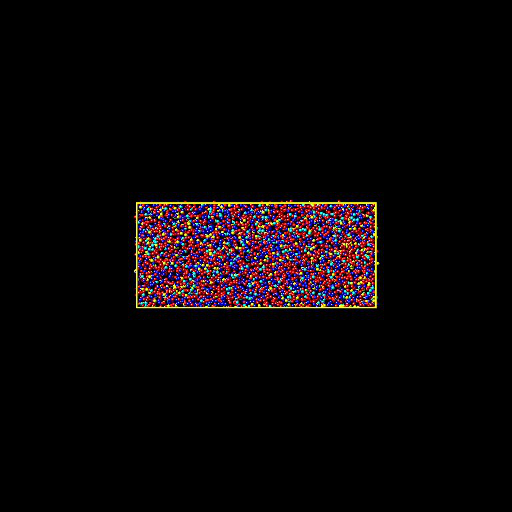

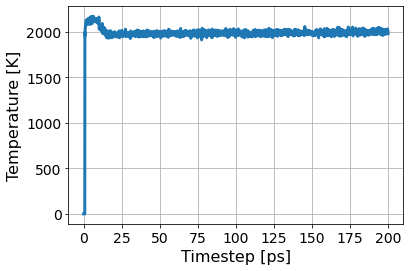

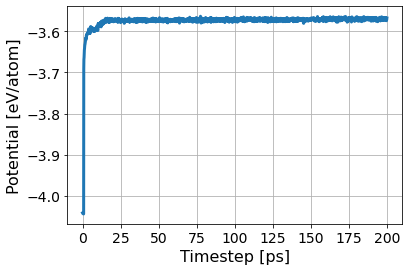

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3b984e4e895e40fcba592c2c18f44831/inputs.yaml
       RUNS/3b984e4e895e40fcba592c2c18f44831
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/3b984e4e895e40fcba592c2c18f44831/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:03<00:00, 182.55s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3b984e4e895e40fcba592c2c18f44831/inputs.yaml
       RUNS/3b984e4e895e40fcba592c2c18f44831
Predicted melting temperature for this potential:  1854.9526530586768
95% confidence interval:  1.27724839896522
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9889322916666666
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 2.000e+01 2.000e+00 2.300e+01 0.000e+00 4.557e+03 4.608e+03]


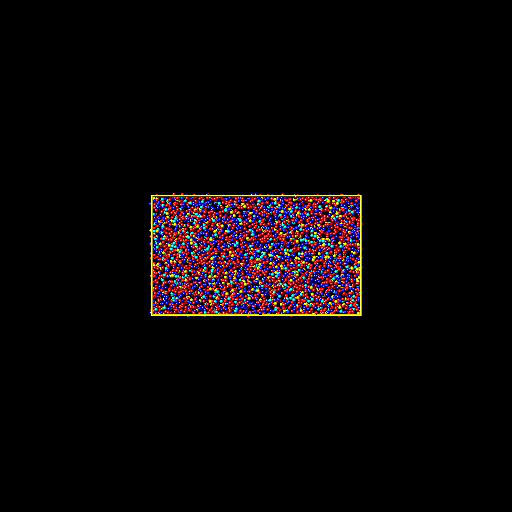

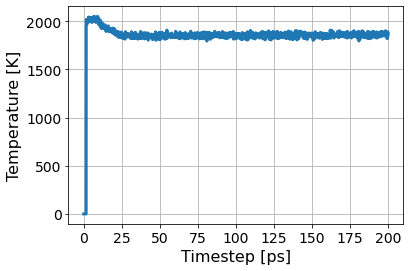

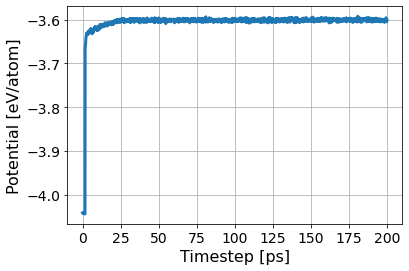

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/9f5c21c12ad04e4ead886aac69b1d734/inputs.yaml
       RUNS/9f5c21c12ad04e4ead886aac69b1d734
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/9f5c21c12ad04e4ead886aac69b1d734/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:07<00:00, 182.71s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/9f5c21c12ad04e4ead886aac69b1d734/inputs.yaml
       RUNS/9f5c21c12ad04e4ead886aac69b1d734
Predicted melting temperature for this potential:  1747.1484617977528
95% confidence interval:  1.1873726882545925
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9865451388888888
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 1.100e+01 4.000e+00 4.000e+01 1.000e+00 4.546e+03 4.608e+03]


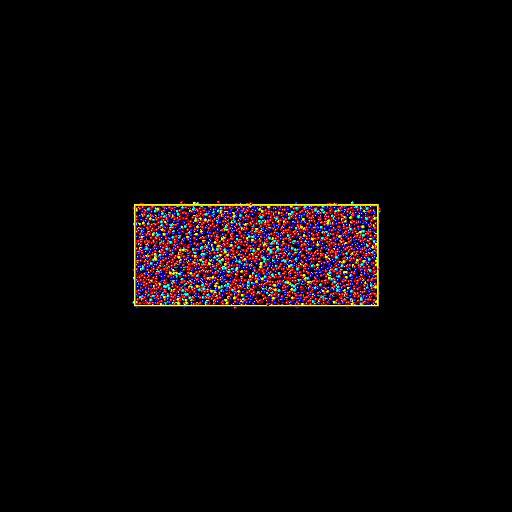

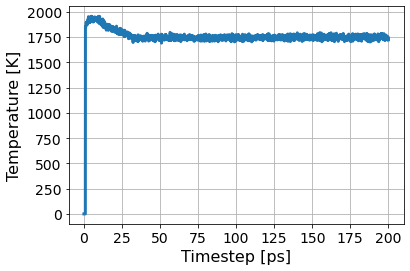

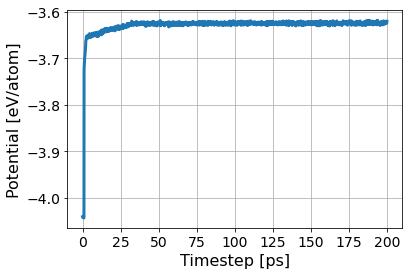

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0e4b74b275b54580b085a7fbcabaa5fe/inputs.yaml
       RUNS/0e4b74b275b54580b085a7fbcabaa5fe
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0e4b74b275b54580b085a7fbcabaa5fe/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:25<00:00, 183.42s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0e4b74b275b54580b085a7fbcabaa5fe/inputs.yaml
       RUNS/0e4b74b275b54580b085a7fbcabaa5fe
Predicted melting temperature for this potential:  1782.7823173533081
95% confidence interval:  1.314889071190523
Fraction of system solid:  0.2645399305555556
Fraction of system liquid:  0.7191840277777778
Simulation Success Flag 0.0
Crystal Structure Info:  [1219.   32.   20.   23.    0. 3314. 4608.]


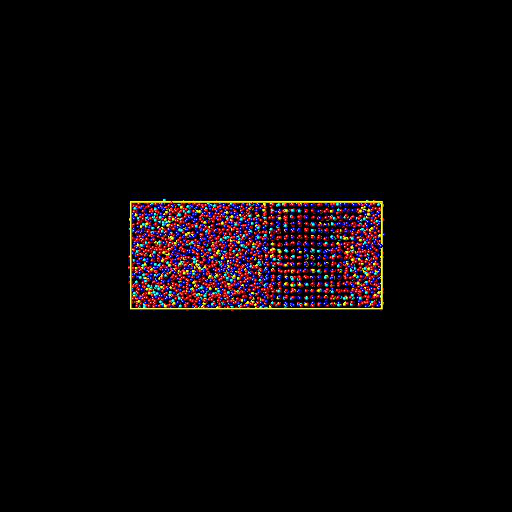

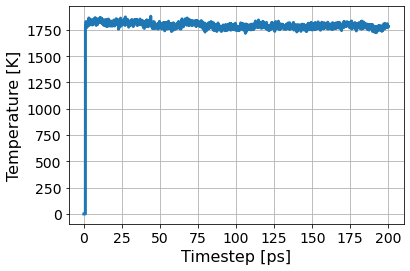

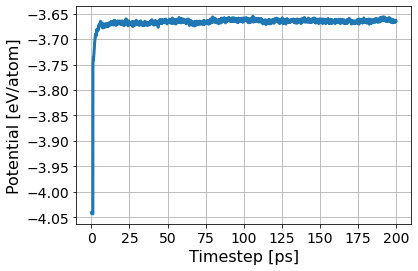

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2dcb8b6cd6374e94be84c302d5c1c060/inputs.yaml
       RUNS/2dcb8b6cd6374e94be84c302d5c1c060
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/2dcb8b6cd6374e94be84c302d5c1c060/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:37<00:00, 186.30s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2dcb8b6cd6374e94be84c302d5c1c060/inputs.yaml
       RUNS/2dcb8b6cd6374e94be84c302d5c1c060
Predicted melting temperature for this potential:  1797.264190761548
95% confidence interval:  1.3950951512321539
Fraction of system solid:  0.5518663194444444
Fraction of system liquid:  0.4366319444444444
Simulation Success Flag 1.0
Crystal Structure Info:  [2543.   32.   16.    5.    0. 2012. 4608.]


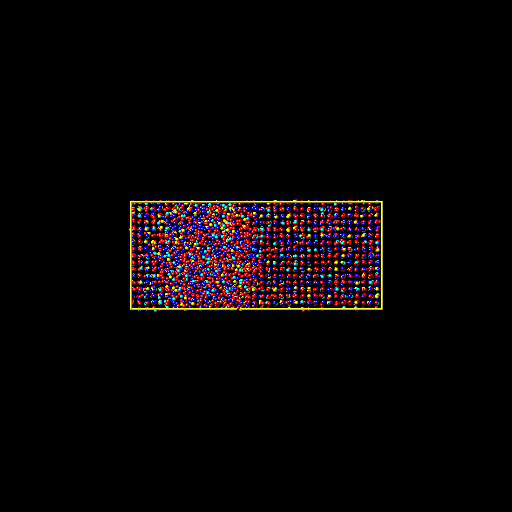

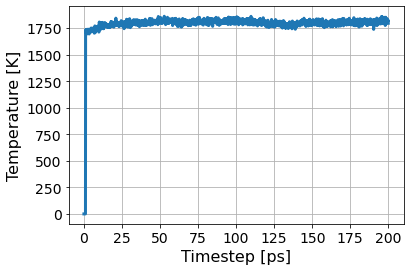

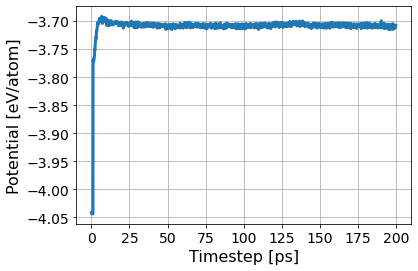

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  6
269
[0.4, 0.1, 0.0, 0.5, 0.0]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/6bdd13bddcb240dc9b2c9fa3372c8eec/inputs.yaml
       RUNS/6bdd13bddcb240dc9b2c9fa3372c8eec
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/6bdd13bddcb240dc9b2c9fa3372c8eec/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:23<00:00, 178.54s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/6bdd13bddcb240dc9b2c9fa3372c8eec/inputs.yaml
       RUNS/6bdd13bddcb240dc9b2c9fa3372c8eec
Predicted melting temperature for this potential:  2440.951586267166
95% confidence interval:  1.6074075370112795
Fraction of system solid:  0.0
Fraction of system liquid:  0.9921875
Simulation Success Flag 0.0
Crystal Structure Info:  [0.000e+00 1.800e+01 3.000e+00 1.400e+01 1.000e+00 4.572e+03 4.608e+03]


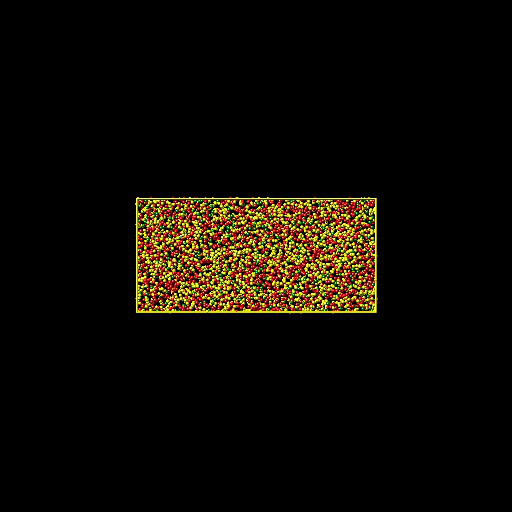

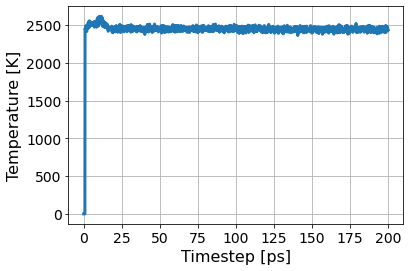

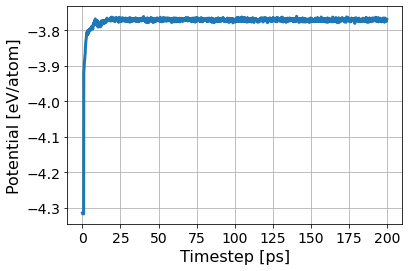

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/34041181725040b59a2a80c213ee049c/inputs.yaml
       RUNS/34041181725040b59a2a80c213ee049c
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/34041181725040b59a2a80c213ee049c/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:49<00:00, 179.58s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/34041181725040b59a2a80c213ee049c/inputs.yaml
       RUNS/34041181725040b59a2a80c213ee049c
Predicted melting temperature for this potential:  2268.3634358302124
95% confidence interval:  4.297974606184593
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9887152777777778
Simulation Success Flag 0.0
Crystal Structure Info:  [   6.   22.    6.   18.    0. 4556. 4608.]


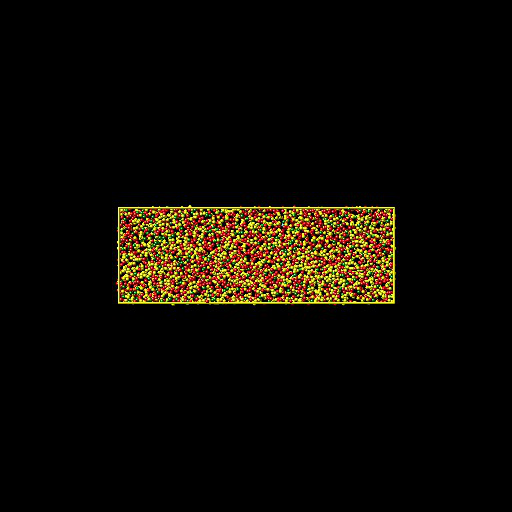

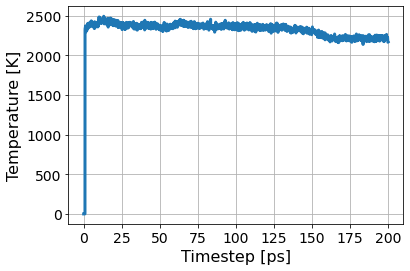

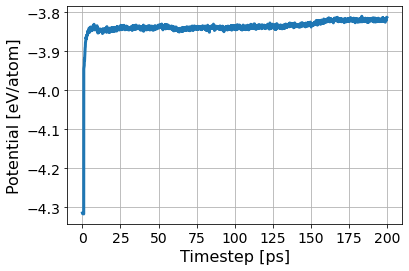

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7ba3c1bca9074705a189f7606f87b13c/inputs.yaml
       RUNS/7ba3c1bca9074705a189f7606f87b13c
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/7ba3c1bca9074705a189f7606f87b13c/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:09<00:00, 180.38s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7ba3c1bca9074705a189f7606f87b13c/inputs.yaml
       RUNS/7ba3c1bca9074705a189f7606f87b13c
Predicted melting temperature for this potential:  2341.502985892634
95% confidence interval:  1.6549924680149173
Fraction of system solid:  0.4270833333333333
Fraction of system liquid:  0.5542534722222222
Simulation Success Flag 1.0
Crystal Structure Info:  [1968.   53.   20.   13.    0. 2554. 4608.]


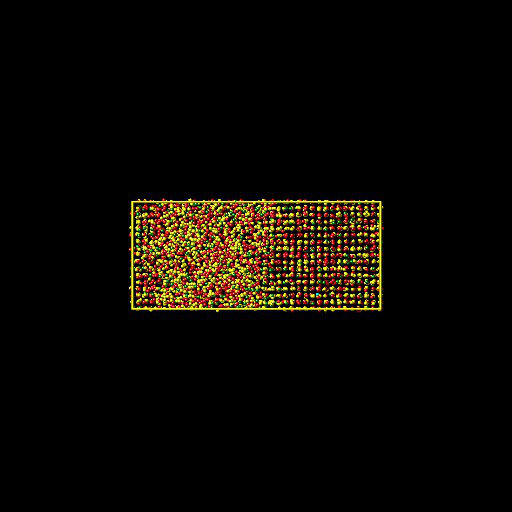

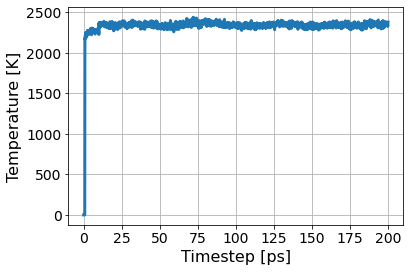

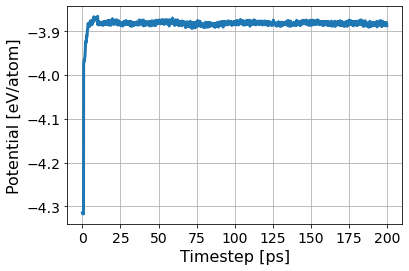

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  7
152
[0.4, 0.0, 0.3, 0.3, 0.0]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/19fbb5f4a54940f4a6e042110d1af443/inputs.yaml
       RUNS/19fbb5f4a54940f4a6e042110d1af443
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/19fbb5f4a54940f4a6e042110d1af443/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:51<00:00, 177.26s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/19fbb5f4a54940f4a6e042110d1af443/inputs.yaml
       RUNS/19fbb5f4a54940f4a6e042110d1af443
Predicted melting temperature for this potential:  2127.749063670412
95% confidence interval:  1.420039931566925
Fraction of system solid:  0.00021701388888888888
Fraction of system liquid:  0.9913194444444444
Simulation Success Flag 0.0
Crystal Structure Info:  [1.000e+00 1.500e+01 0.000e+00 2.400e+01 0.000e+00 4.568e+03 4.608e+03]


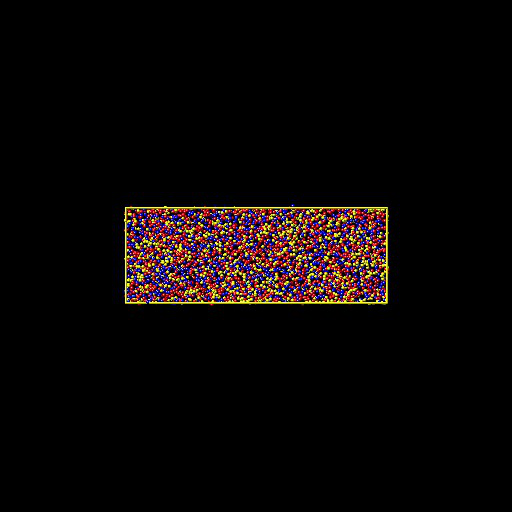

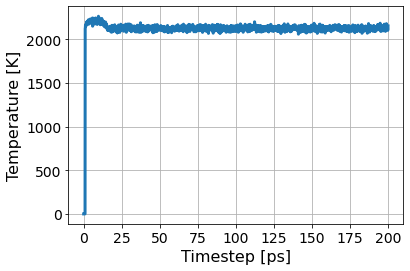

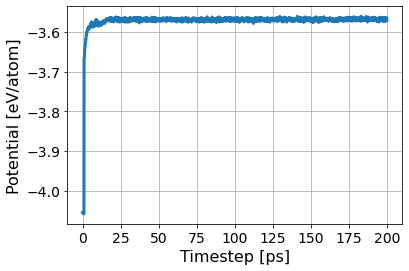

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f315611600cc48129952bd2119179796/inputs.yaml
       RUNS/f315611600cc48129952bd2119179796
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/f315611600cc48129952bd2119179796/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:53<00:00, 177.34s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f315611600cc48129952bd2119179796/inputs.yaml
       RUNS/f315611600cc48129952bd2119179796
Predicted melting temperature for this potential:  2017.8715334581773
95% confidence interval:  1.3143679223872777
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.98828125
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 2.300e+01 2.000e+00 2.200e+01 2.000e+00 4.554e+03 4.608e+03]


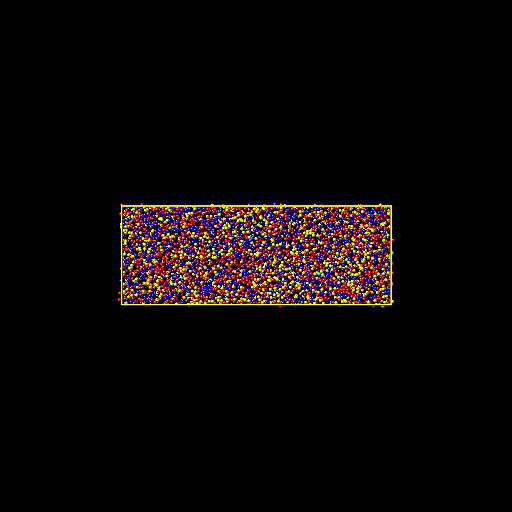

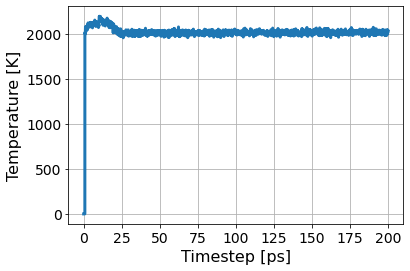

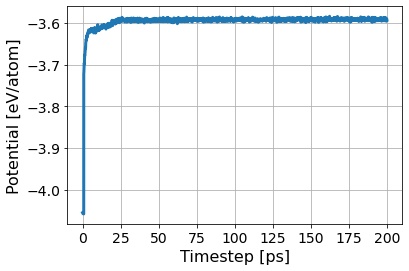

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b084d1606d2b4f5c9821dee2ae9cb9c1/inputs.yaml
       RUNS/b084d1606d2b4f5c9821dee2ae9cb9c1
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/b084d1606d2b4f5c9821dee2ae9cb9c1/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:11<00:00, 180.46s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b084d1606d2b4f5c9821dee2ae9cb9c1/inputs.yaml
       RUNS/b084d1606d2b4f5c9821dee2ae9cb9c1
Predicted melting temperature for this potential:  1968.077728838951
95% confidence interval:  2.127568368192937
Fraction of system solid:  0.1870659722222222
Fraction of system liquid:  0.7996961805555556
Simulation Success Flag 0.0
Crystal Structure Info:  [ 862.   37.   13.   11.    0. 3685. 4608.]


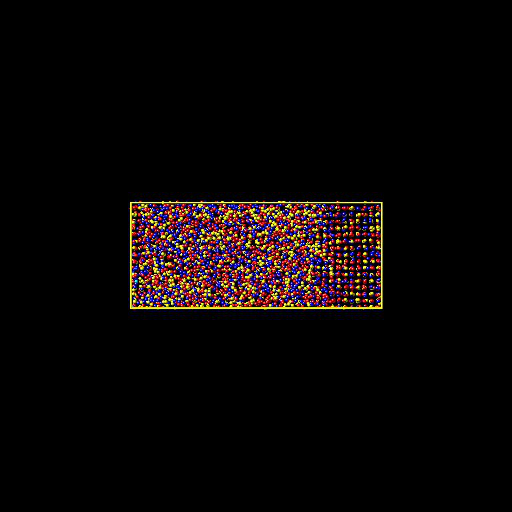

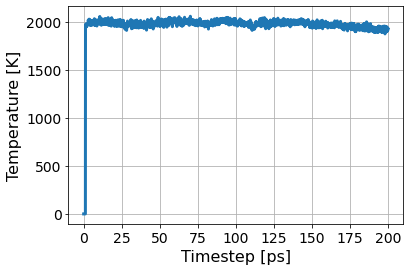

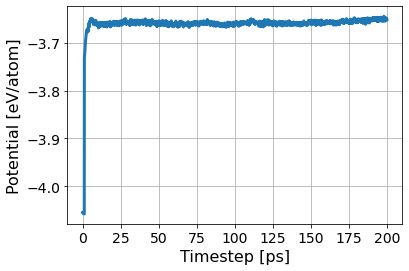

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/36012e14bcf14e85be8b18933271cbaf/inputs.yaml
       RUNS/36012e14bcf14e85be8b18933271cbaf
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/36012e14bcf14e85be8b18933271cbaf/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:25<00:00, 181.03s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/36012e14bcf14e85be8b18933271cbaf/inputs.yaml
       RUNS/36012e14bcf14e85be8b18933271cbaf
Predicted melting temperature for this potential:  1945.5252039950064
95% confidence interval:  1.3851069662908302
Fraction of system solid:  0.4192708333333333
Fraction of system liquid:  0.5653211805555556
Simulation Success Flag 1.0
Crystal Structure Info:  [1.932e+03 4.600e+01 1.300e+01 1.100e+01 1.000e+00 2.605e+03 4.608e+03]


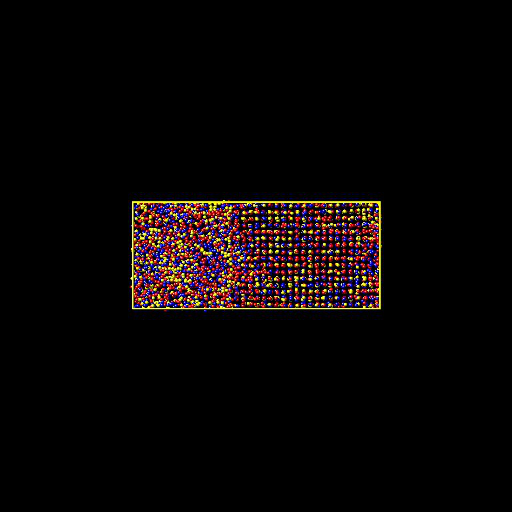

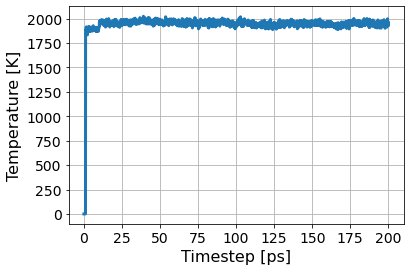

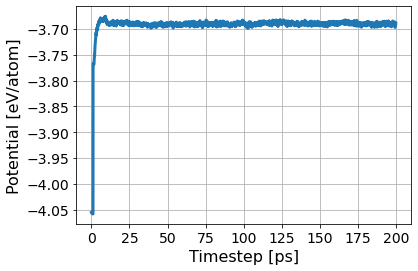

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  8
238
[0.2, 0.1, 0.3, 0.0, 0.4]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/66137ef9cf184e6499d1e74fd7e6fb1a/inputs.yaml
       RUNS/66137ef9cf184e6499d1e74fd7e6fb1a
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/66137ef9cf184e6499d1e74fd7e6fb1a/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:43<00:00, 184.14s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/66137ef9cf184e6499d1e74fd7e6fb1a/inputs.yaml
       RUNS/66137ef9cf184e6499d1e74fd7e6fb1a
Predicted melting temperature for this potential:  1878.6481861423222
95% confidence interval:  1.234502199891821
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.990234375
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 2.600e+01 2.000e+00 1.400e+01 1.000e+00 4.563e+03 4.608e+03]


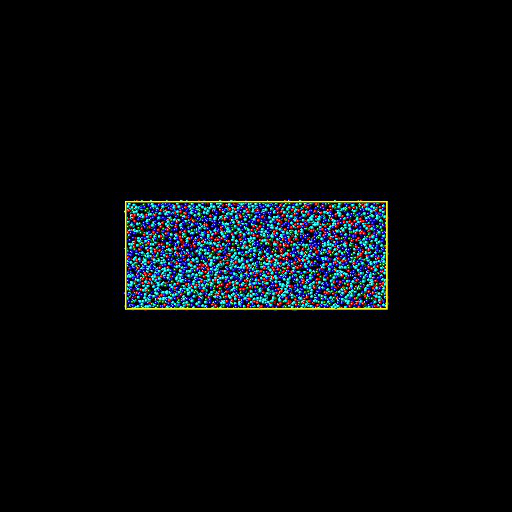

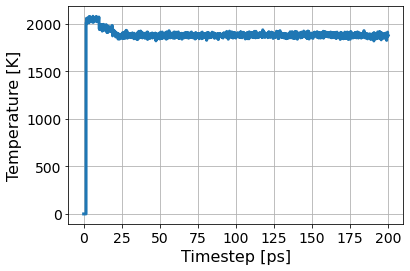

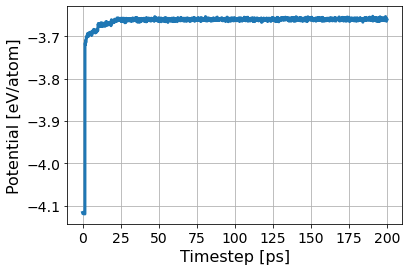

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f70febce1e6e4fdcb8fd89b58447119f/inputs.yaml
       RUNS/f70febce1e6e4fdcb8fd89b58447119f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/f70febce1e6e4fdcb8fd89b58447119f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:38<00:00, 183.95s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f70febce1e6e4fdcb8fd89b58447119f/inputs.yaml
       RUNS/f70febce1e6e4fdcb8fd89b58447119f
Predicted melting temperature for this potential:  1834.3424494382025
95% confidence interval:  1.5416403575372177
Fraction of system solid:  0.1773003472222222
Fraction of system liquid:  0.8064236111111112
Simulation Success Flag 0.0
Crystal Structure Info:  [ 817.   41.   15.   19.    0. 3716. 4608.]


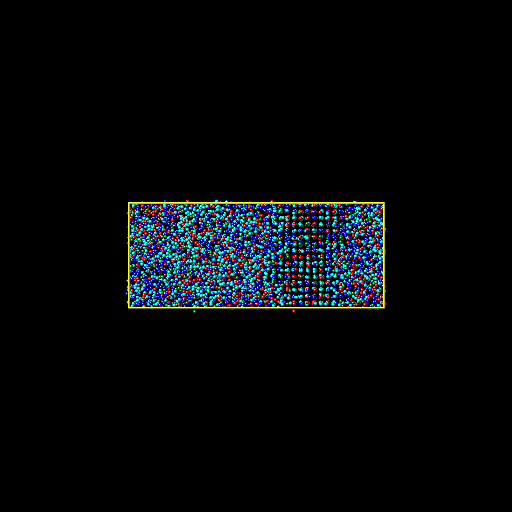

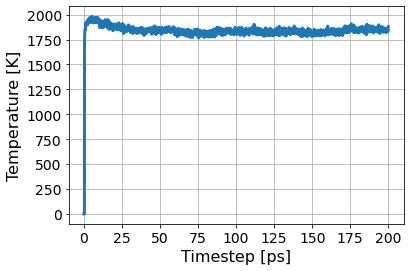

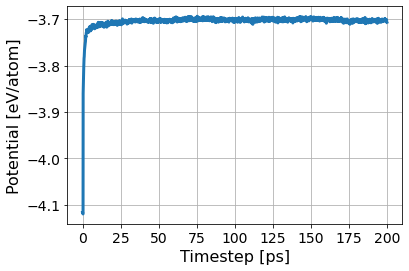

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b4b10f984480440e920386e64987f497/inputs.yaml
       RUNS/b4b10f984480440e920386e64987f497
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/b4b10f984480440e920386e64987f497/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:37<00:00, 186.31s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b4b10f984480440e920386e64987f497/inputs.yaml
       RUNS/b4b10f984480440e920386e64987f497
Predicted melting temperature for this potential:  1825.1040235955056
95% confidence interval:  1.6142152081672017
Fraction of system solid:  0.2879774305555556
Fraction of system liquid:  0.697265625
Simulation Success Flag 0.0
Crystal Structure Info:  [1327.   28.   19.   21.    0. 3213. 4608.]


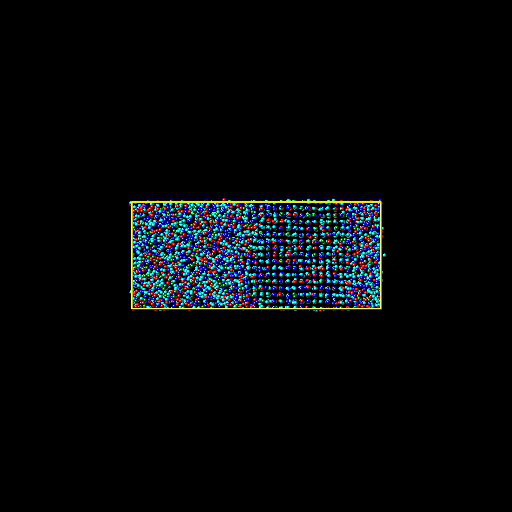

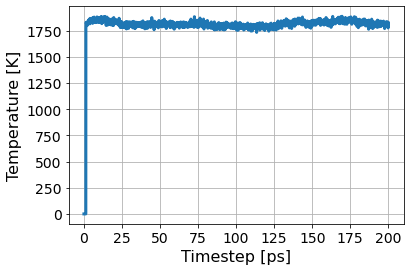

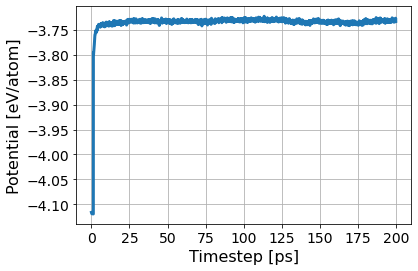

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f96ca99a8a434c58b0d535a67ea36643/inputs.yaml
       RUNS/f96ca99a8a434c58b0d535a67ea36643
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/f96ca99a8a434c58b0d535a67ea36643/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:52<00:00, 189.31s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f96ca99a8a434c58b0d535a67ea36643/inputs.yaml
       RUNS/f96ca99a8a434c58b0d535a67ea36643
Predicted melting temperature for this potential:  1807.2551325842699
95% confidence interval:  1.3047823813463606
Fraction of system solid:  0.5004340277777778
Fraction of system liquid:  0.4876302083333333
Simulation Success Flag 1.0
Crystal Structure Info:  [2306.   34.   15.    6.    0. 2247. 4608.]


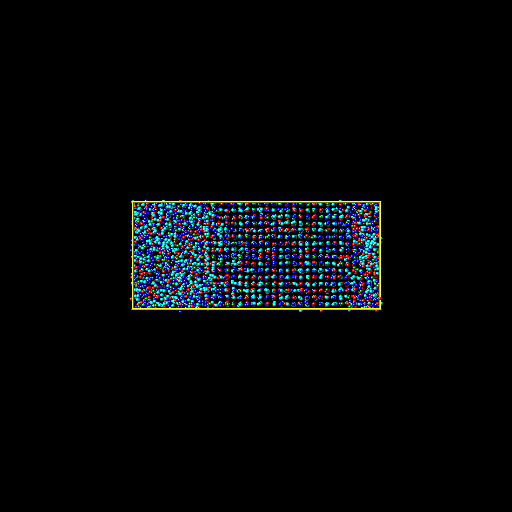

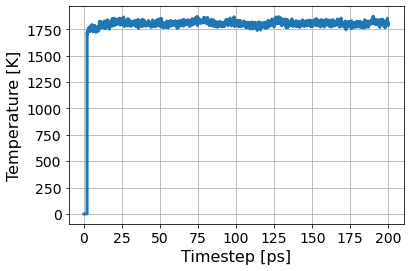

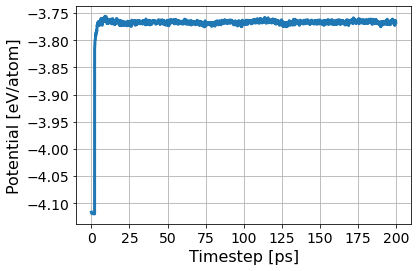

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  9
255
[0.3, 0.1, 0.2, 0.0, 0.4]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7cbfe426fabf4fde8338fa2d7e2d8e65/inputs.yaml
       RUNS/7cbfe426fabf4fde8338fa2d7e2d8e65
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/7cbfe426fabf4fde8338fa2d7e2d8e65/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:12<00:00, 185.31s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7cbfe426fabf4fde8338fa2d7e2d8e65/inputs.yaml
       RUNS/7cbfe426fabf4fde8338fa2d7e2d8e65
Predicted melting temperature for this potential:  1955.8344378277154
95% confidence interval:  1.2778488776487136
Fraction of system solid:  0.0008680555555555555
Fraction of system liquid:  0.9913194444444444
Simulation Success Flag 0.0
Crystal Structure Info:  [4.000e+00 1.300e+01 3.000e+00 1.900e+01 1.000e+00 4.568e+03 4.608e+03]


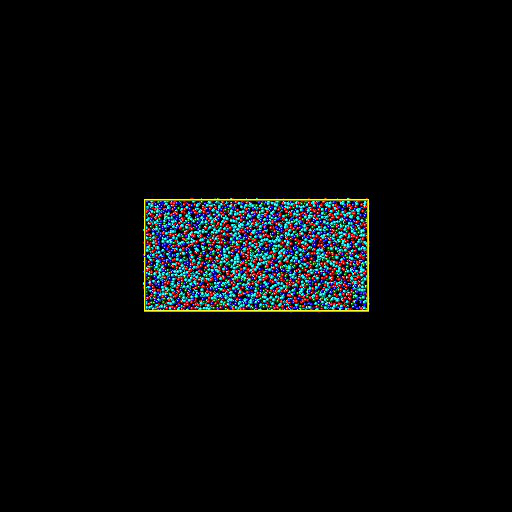

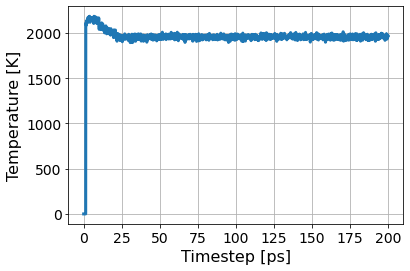

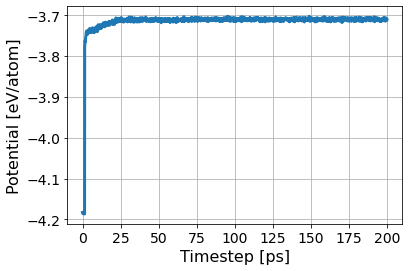

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8c1495808346451a8a1a046272af2622/inputs.yaml
       RUNS/8c1495808346451a8a1a046272af2622
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/8c1495808346451a8a1a046272af2622/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:59<00:00, 187.19s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8c1495808346451a8a1a046272af2622/inputs.yaml
       RUNS/8c1495808346451a8a1a046272af2622
Predicted melting temperature for this potential:  1826.841231585518
95% confidence interval:  1.1978938325963824
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9895833333333334
Simulation Success Flag 0.0
Crystal Structure Info:  [   6.   18.    5.   19.    0. 4560. 4608.]


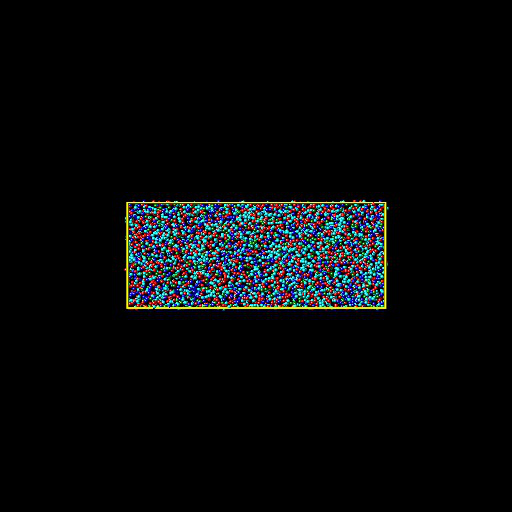

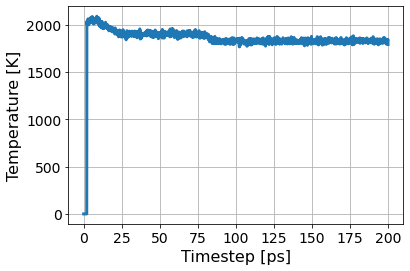

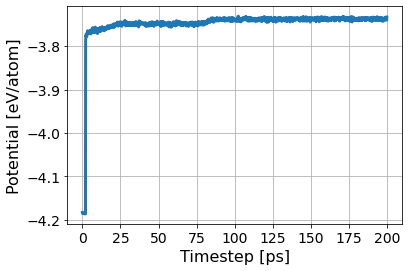

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b966330827ce43e8a2a5554dd58e5437/inputs.yaml
       RUNS/b966330827ce43e8a2a5554dd58e5437
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/b966330827ce43e8a2a5554dd58e5437/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:31<00:00, 188.47s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b966330827ce43e8a2a5554dd58e5437/inputs.yaml
       RUNS/b966330827ce43e8a2a5554dd58e5437
Predicted melting temperature for this potential:  1870.4606382022469
95% confidence interval:  1.7467794838416717
Fraction of system solid:  0.19813368055555555
Fraction of system liquid:  0.7860243055555556
Simulation Success Flag 0.0
Crystal Structure Info:  [ 913.   44.   11.   18.    0. 3622. 4608.]


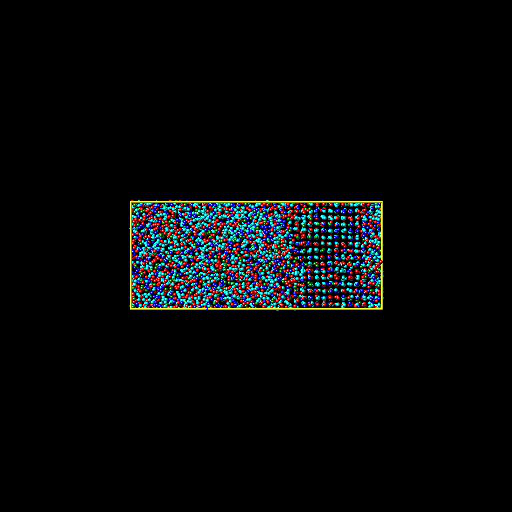

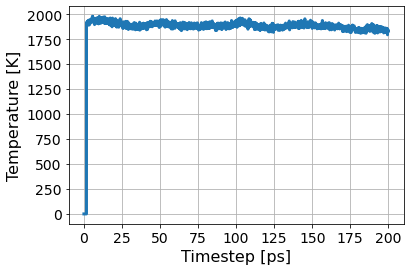

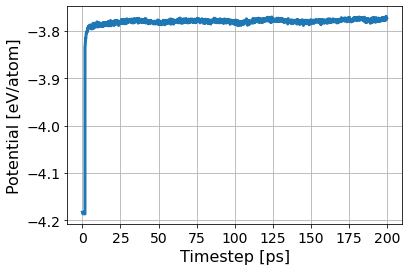

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b909f8cea81446d18b8cccad4e84fcb3/inputs.yaml
       RUNS/b909f8cea81446d18b8cccad4e84fcb3
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/b909f8cea81446d18b8cccad4e84fcb3/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:19:45<00:00, 191.44s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b909f8cea81446d18b8cccad4e84fcb3/inputs.yaml
       RUNS/b909f8cea81446d18b8cccad4e84fcb3
Predicted melting temperature for this potential:  1885.7935149812736
95% confidence interval:  1.448174681769394
Fraction of system solid:  0.513671875
Fraction of system liquid:  0.4702690972222222
Simulation Success Flag 1.0
Crystal Structure Info:  [2.367e+03 4.900e+01 1.700e+01 7.000e+00 1.000e+00 2.167e+03 4.608e+03]


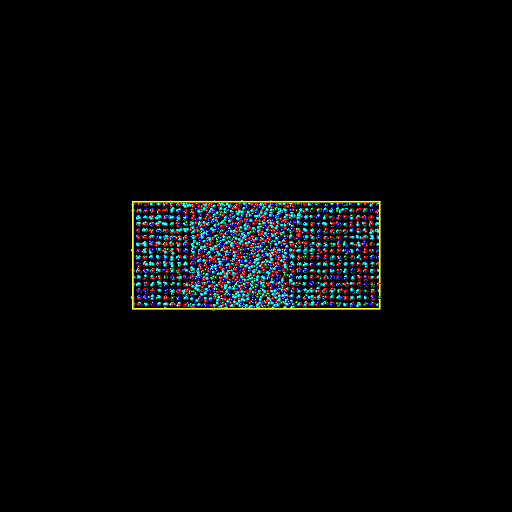

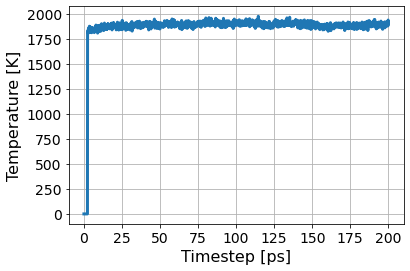

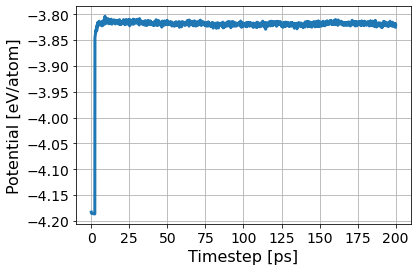

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  10
237
[0.2, 0.1, 0.2, 0.5, 0.0]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/d15ae014326b4ca7b8f5c1ff47c53aa1/inputs.yaml
       RUNS/d15ae014326b4ca7b8f5c1ff47c53aa1
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/d15ae014326b4ca7b8f5c1ff47c53aa1/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:39<00:00, 181.58s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/d15ae014326b4ca7b8f5c1ff47c53aa1/inputs.yaml
       RUNS/d15ae014326b4ca7b8f5c1ff47c53aa1
Predicted melting temperature for this potential:  2439.853165667915
95% confidence interval:  1.5052556841677225
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9904513888888888
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 1.900e+01 4.000e+00 1.500e+01 1.000e+00 4.564e+03 4.608e+03]


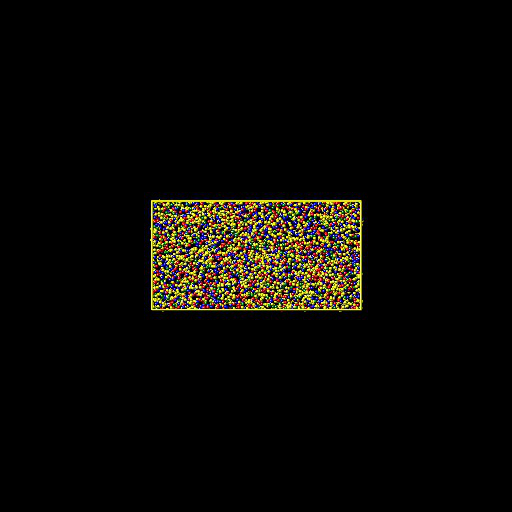

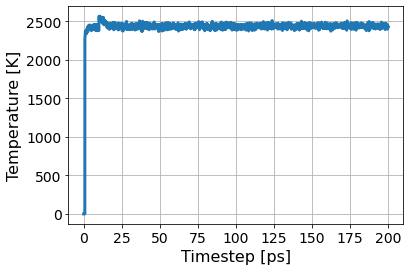

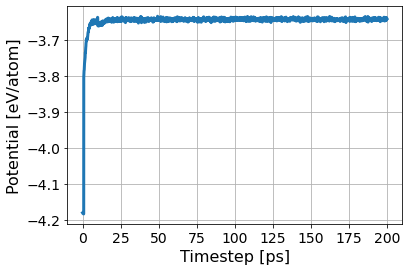

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/60206817d91645c0be3d2f873946c4be/inputs.yaml
       RUNS/60206817d91645c0be3d2f873946c4be
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/60206817d91645c0be3d2f873946c4be/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:11<00:00, 182.87s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/60206817d91645c0be3d2f873946c4be/inputs.yaml
       RUNS/60206817d91645c0be3d2f873946c4be
Predicted melting temperature for this potential:  2260.8610438202245
95% confidence interval:  1.504337863258994
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9893663194444444
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 2.200e+01 0.000e+00 2.100e+01 1.000e+00 4.559e+03 4.608e+03]


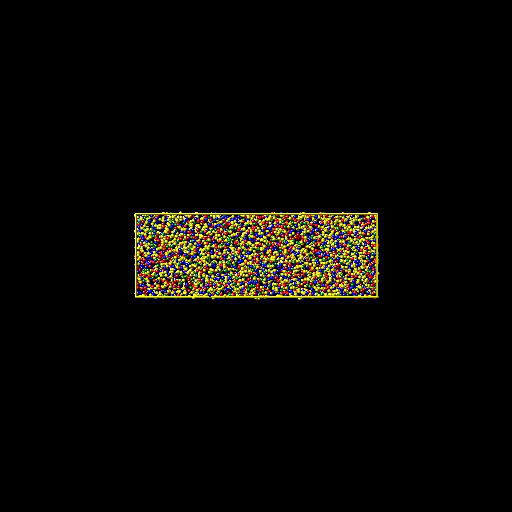

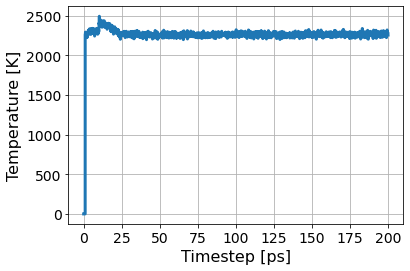

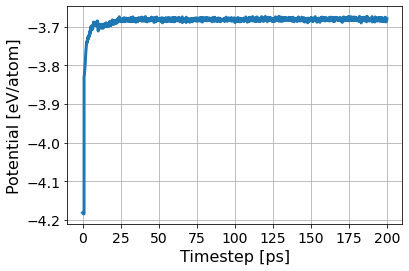

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/6c4f9d812dda4138a0c7a428b0a538ec/inputs.yaml
       RUNS/6c4f9d812dda4138a0c7a428b0a538ec
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/6c4f9d812dda4138a0c7a428b0a538ec/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:56<00:00, 184.67s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/6c4f9d812dda4138a0c7a428b0a538ec/inputs.yaml
       RUNS/6c4f9d812dda4138a0c7a428b0a538ec
Predicted melting temperature for this potential:  2238.2546755305866
95% confidence interval:  1.7924260266599745
Fraction of system solid:  0.3763020833333333
Fraction of system liquid:  0.6072048611111112
Simulation Success Flag 1.0
Crystal Structure Info:  [1.734e+03 5.400e+01 1.700e+01 4.000e+00 1.000e+00 2.798e+03 4.608e+03]


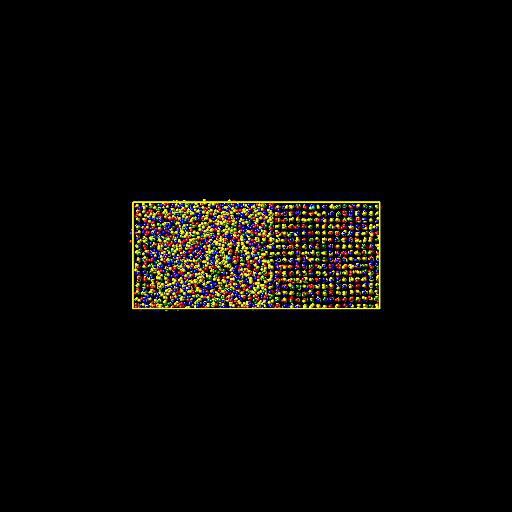

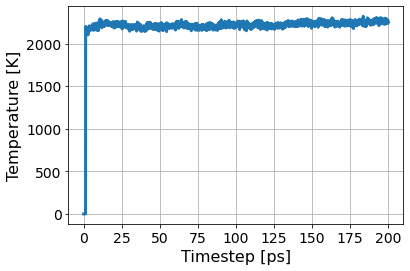

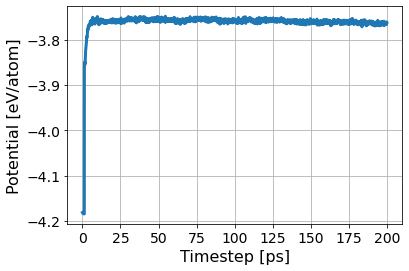

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  11
246
[0.3, 0.1, 0.0, 0.1, 0.5]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/4c1da3d99a3c4af68d190023e79fe91a/inputs.yaml
       RUNS/4c1da3d99a3c4af68d190023e79fe91a
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/4c1da3d99a3c4af68d190023e79fe91a/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:46<00:00, 184.26s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/4c1da3d99a3c4af68d190023e79fe91a/inputs.yaml
       RUNS/4c1da3d99a3c4af68d190023e79fe91a
Predicted melting temperature for this potential:  2168.478775156055
95% confidence interval:  1.4912785360735485
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.986328125
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 2.700e+01 0.000e+00 3.300e+01 1.000e+00 4.545e+03 4.608e+03]


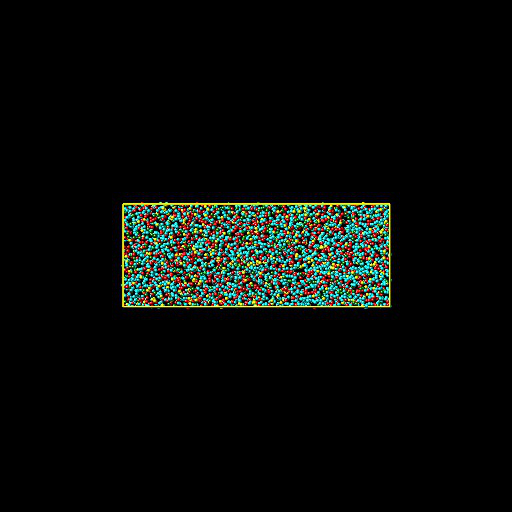

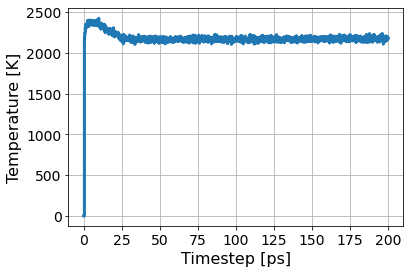

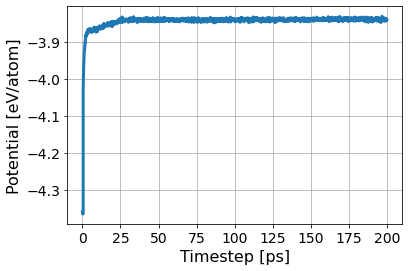

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e9ab6c89c71e44768134cd1320e31e84/inputs.yaml
       RUNS/e9ab6c89c71e44768134cd1320e31e84
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/e9ab6c89c71e44768134cd1320e31e84/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:30<00:00, 186.03s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e9ab6c89c71e44768134cd1320e31e84/inputs.yaml
       RUNS/e9ab6c89c71e44768134cd1320e31e84
Predicted melting temperature for this potential:  2180.5519626716605
95% confidence interval:  1.703173013822268
Fraction of system solid:  0.2986111111111111
Fraction of system liquid:  0.6848958333333334
Simulation Success Flag 0.0
Crystal Structure Info:  [1376.   49.   16.   11.    0. 3156. 4608.]


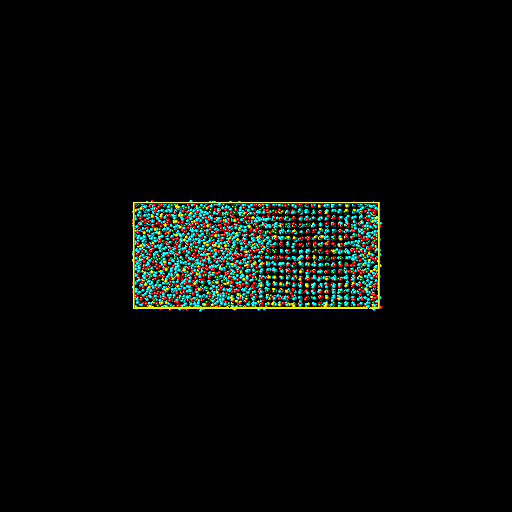

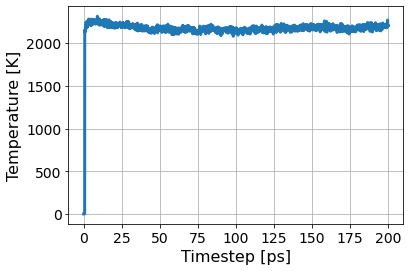

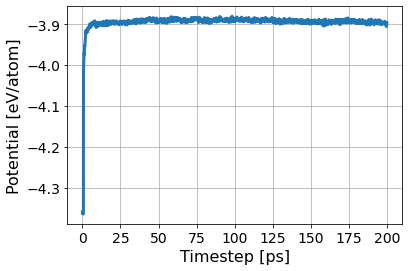

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/6f2df059a56b44ef84ba118e52a5476c/inputs.yaml
       RUNS/6f2df059a56b44ef84ba118e52a5476c
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/6f2df059a56b44ef84ba118e52a5476c/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:47<00:00, 186.71s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/6f2df059a56b44ef84ba118e52a5476c/inputs.yaml
       RUNS/6f2df059a56b44ef84ba118e52a5476c
Predicted melting temperature for this potential:  2177.436470411985
95% confidence interval:  1.6850954857913674
Fraction of system solid:  0.4177517361111111
Fraction of system liquid:  0.5631510416666666
Simulation Success Flag 1.0
Crystal Structure Info:  [1925.   51.   31.    6.    0. 2595. 4608.]


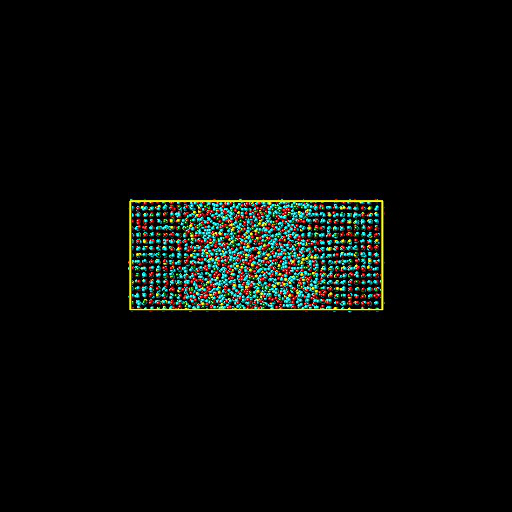

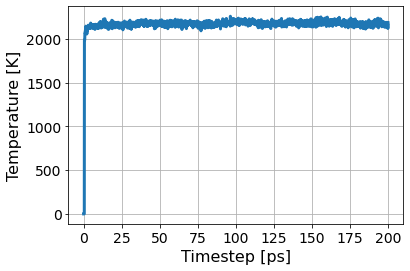

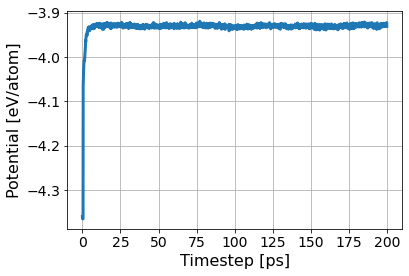

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  12
493
[0.0, 0.4, 0.4, 0.2, 0.0]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/1b2ce99252ad4658847f1443c3adf424/inputs.yaml
       RUNS/1b2ce99252ad4658847f1443c3adf424
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/1b2ce99252ad4658847f1443c3adf424/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:10<00:00, 175.62s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/1b2ce99252ad4658847f1443c3adf424/inputs.yaml
       RUNS/1b2ce99252ad4658847f1443c3adf424
Predicted melting temperature for this potential:  2088.9923615480648
95% confidence interval:  1.4163904419696958
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9904513888888888
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 1.000e+01 1.000e+00 2.600e+01 1.000e+00 4.564e+03 4.608e+03]


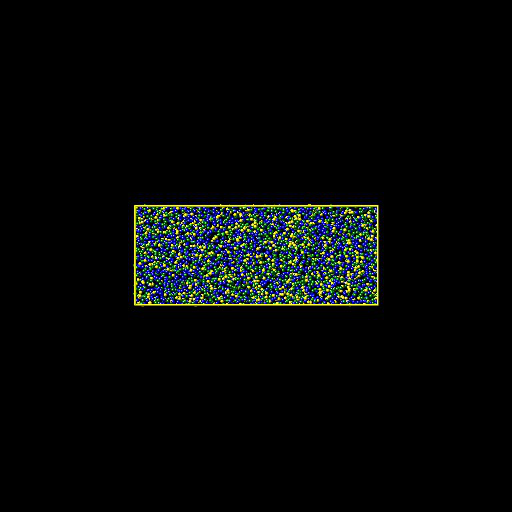

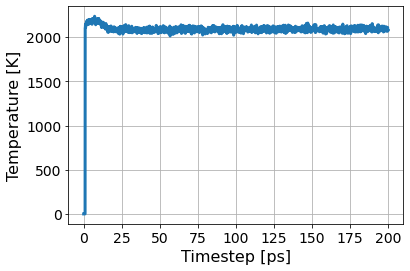

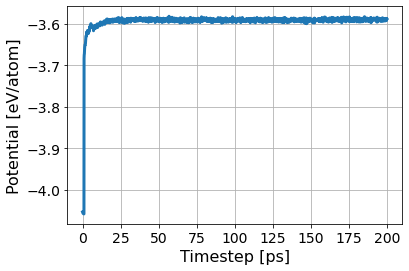

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/acfac73cb1b54d27b74ea35917c975f0/inputs.yaml
       RUNS/acfac73cb1b54d27b74ea35917c975f0
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/acfac73cb1b54d27b74ea35917c975f0/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:49<00:00, 177.18s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/acfac73cb1b54d27b74ea35917c975f0/inputs.yaml
       RUNS/acfac73cb1b54d27b74ea35917c975f0
Predicted melting temperature for this potential:  1951.0414014981272
95% confidence interval:  1.2803963264738332
Fraction of system solid:  0.001953125
Fraction of system liquid:  0.9880642361111112
Simulation Success Flag 0.0
Crystal Structure Info:  [9.000e+00 1.800e+01 1.000e+00 2.500e+01 2.000e+00 4.553e+03 4.608e+03]


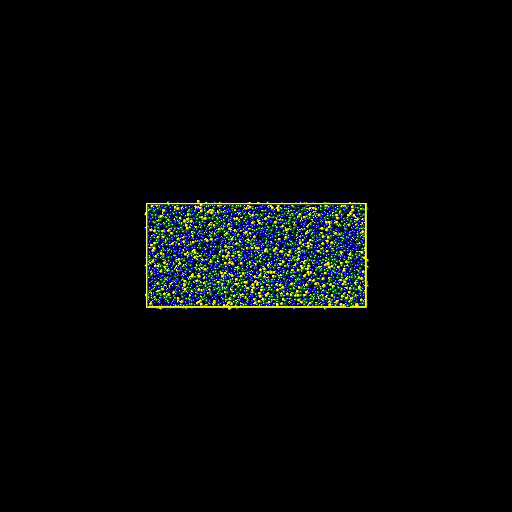

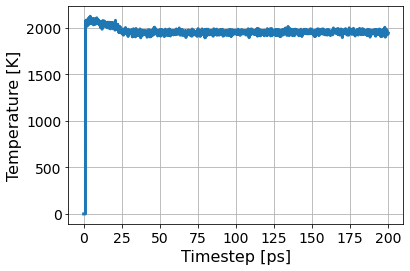

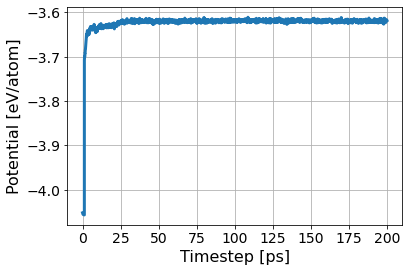

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8f6f3ca0021b405893d16fd4042ea4d4/inputs.yaml
       RUNS/8f6f3ca0021b405893d16fd4042ea4d4
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/8f6f3ca0021b405893d16fd4042ea4d4/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:05<00:00, 177.82s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8f6f3ca0021b405893d16fd4042ea4d4/inputs.yaml
       RUNS/8f6f3ca0021b405893d16fd4042ea4d4
Predicted melting temperature for this potential:  1935.7380225967543
95% confidence interval:  1.420600315830464
Fraction of system solid:  0.16861979166666666
Fraction of system liquid:  0.8131510416666666
Simulation Success Flag 0.0
Crystal Structure Info:  [7.770e+02 4.800e+01 2.500e+01 1.000e+01 1.000e+00 3.747e+03 4.608e+03]


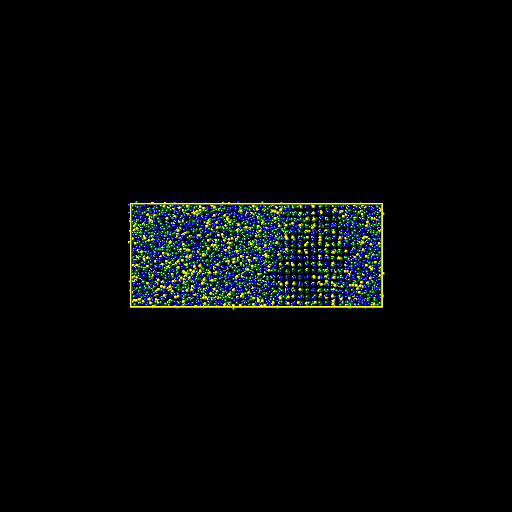

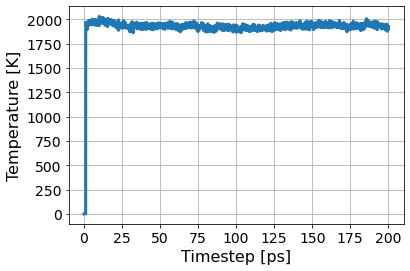

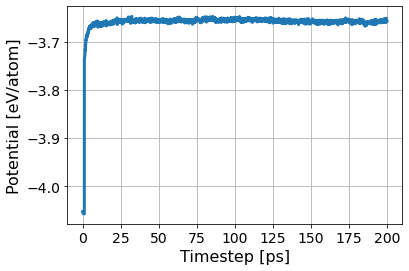

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/9712bb89262148f3828e7275b4fafdcb/inputs.yaml
       RUNS/9712bb89262148f3828e7275b4fafdcb
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/9712bb89262148f3828e7275b4fafdcb/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:50<00:00, 179.62s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/9712bb89262148f3828e7275b4fafdcb/inputs.yaml
       RUNS/9712bb89262148f3828e7275b4fafdcb
Predicted melting temperature for this potential:  1915.2791831460675
95% confidence interval:  1.226258437472076
Fraction of system solid:  0.3810763888888889
Fraction of system liquid:  0.6004774305555556
Simulation Success Flag 1.0
Crystal Structure Info:  [1756.   52.   26.    7.    0. 2767. 4608.]


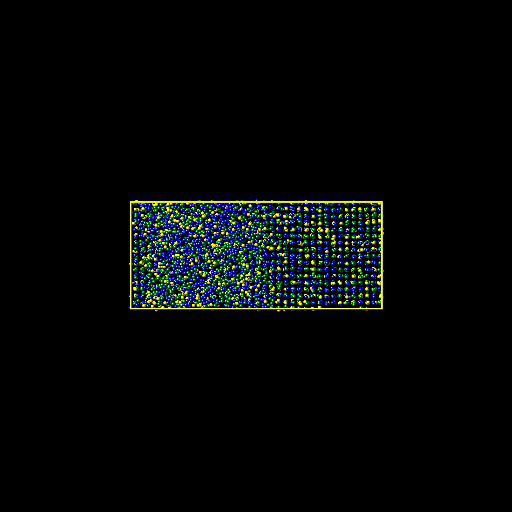

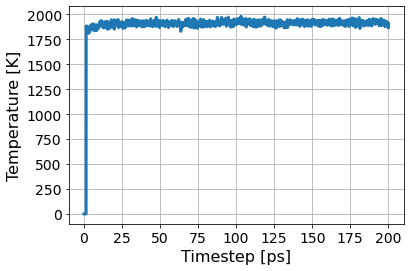

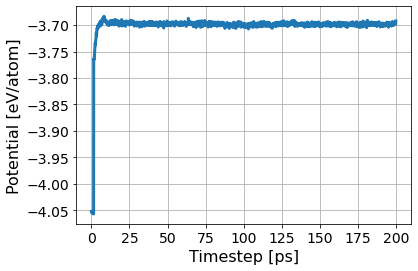

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  13
540
[0.5, 0.4, 0.0, 0.0, 0.1]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/48edd10dbcc1471fbab49436d5b5519f/inputs.yaml
       RUNS/48edd10dbcc1471fbab49436d5b5519f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/48edd10dbcc1471fbab49436d5b5519f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:17<00:00, 178.30s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/48edd10dbcc1471fbab49436d5b5519f/inputs.yaml
       RUNS/48edd10dbcc1471fbab49436d5b5519f
Predicted melting temperature for this potential:  2052.611674781523
95% confidence interval:  1.3891030039409407
Fraction of system solid:  0.0006510416666666666
Fraction of system liquid:  0.9874131944444444
Simulation Success Flag 0.0
Crystal Structure Info:  [3.000e+00 2.300e+01 2.000e+00 3.000e+01 0.000e+00 4.550e+03 4.608e+03]


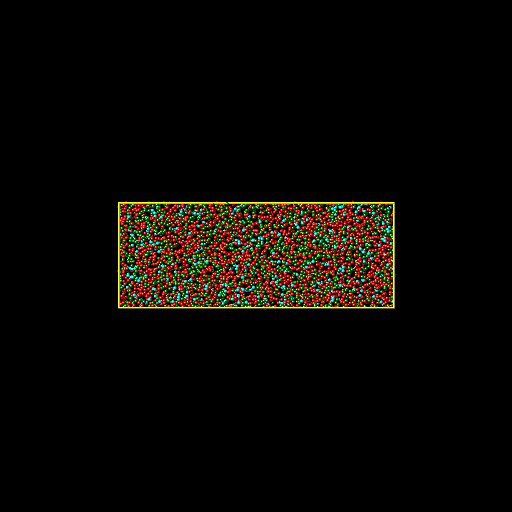

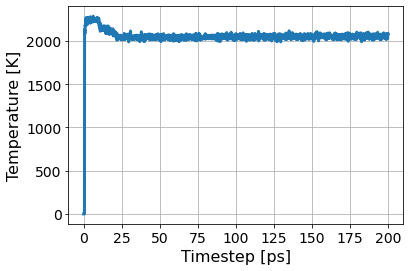

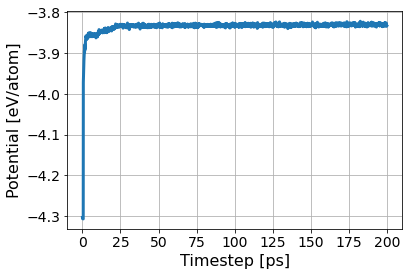

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0ef16bdfae4f472fa9b68adb5e2b526d/inputs.yaml
       RUNS/0ef16bdfae4f472fa9b68adb5e2b526d
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0ef16bdfae4f472fa9b68adb5e2b526d/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:52<00:00, 179.70s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0ef16bdfae4f472fa9b68adb5e2b526d/inputs.yaml
       RUNS/0ef16bdfae4f472fa9b68adb5e2b526d
Predicted melting temperature for this potential:  1945.924377153558
95% confidence interval:  1.2895750485356234
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.984375
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 2.800e+01 5.000e+00 3.200e+01 1.000e+00 4.536e+03 4.608e+03]


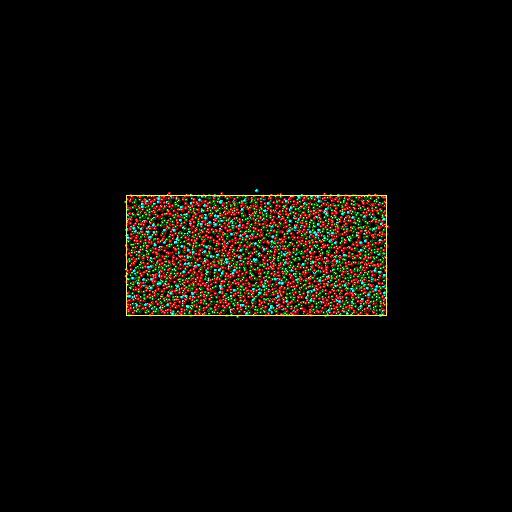

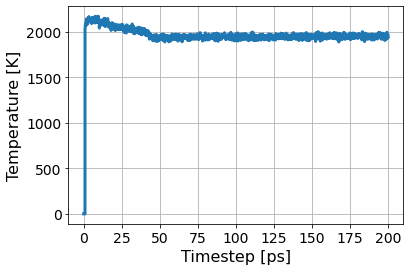

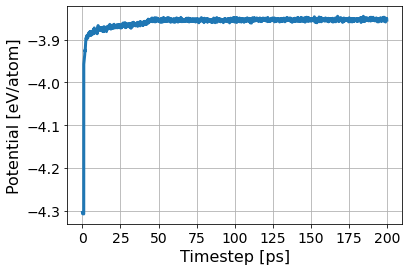

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3971e8c1d3b04afba0dc9832415a5134/inputs.yaml
       RUNS/3971e8c1d3b04afba0dc9832415a5134
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/3971e8c1d3b04afba0dc9832415a5134/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:20<00:00, 180.82s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3971e8c1d3b04afba0dc9832415a5134/inputs.yaml
       RUNS/3971e8c1d3b04afba0dc9832415a5134
Predicted melting temperature for this potential:  2043.6768679151062
95% confidence interval:  1.6001609930120468
Fraction of system solid:  0.4038628472222222
Fraction of system liquid:  0.5720486111111112
Simulation Success Flag 1.0
Crystal Structure Info:  [1861.   70.   31.   10.    0. 2636. 4608.]


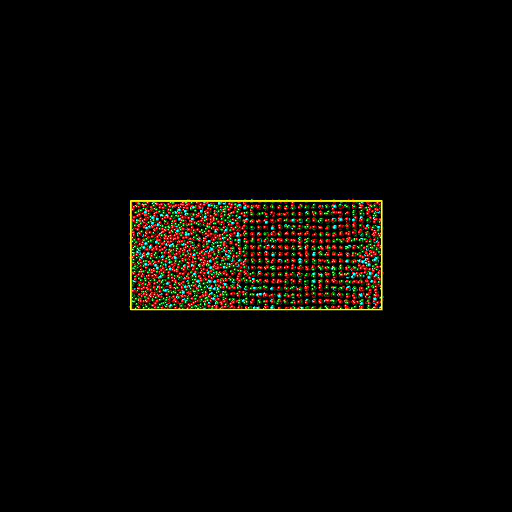

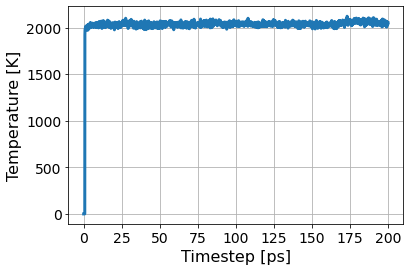

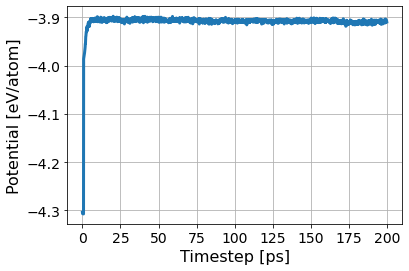

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  14
264
[0.4, 0.1, 0.0, 0.0, 0.5]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/d92e05ed89f0471198f624741c6f4e7f/inputs.yaml
       RUNS/d92e05ed89f0471198f624741c6f4e7f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/d92e05ed89f0471198f624741c6f4e7f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing:  52%|??????    | 13/25 [00:20<00:06,  1.95cell/s]

In [ ]:
n_steps = 40 #number of expirements
all_inds = set(range(len(y))) #set indexes
actaul_exp = np.sum(in_train)-len(initial_data)
gif_images = [] #list to save gifs as 2D array

history_train = [list(set(np.where(in_train)[0].tolist()))]
current_train_inds = []
#reset_comps = all_compositions.reset_index(drop=True)

#Create dataframe to save values to make into excel
saved_data = pd.DataFrame(columns=['IAF','Composition','Experiment',"Simulated Tm","Predicted Tm","Predicted Uncertainty","T_Solid","T_Liquid","Index"])
df2 = pd.DataFrame(columns = sample)

patience_counter = 0

print(len(history_train[-1]))

for i in range(n_steps):

    print("-------------------------------------------------------------")
    print("Experiment # ", i)
    
    current_train_inds = history_train[-1].copy()

    current_search_inds = list(all_inds.difference(current_train_inds))
    
    #Random Forest fitting and predicting
    model.fit(X[current_train_inds], y[current_train_inds]) #train model, with entry_number
    current_y_pred, current_y_std = model.predict(X[current_search_inds], return_std=True) #pred

    # ACQUISITION FUNCTIONS
    
    # EARLY STOPPING / ACQUISITION
    
    iaf = "Random"
    
    if iaf == "MEI":
    
        index_of_prediction = np.argmax(current_y_pred)    # MEI   
        
        if np.max(current_y_pred) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0
    
    elif iaf == "UCB":
        
        index_of_prediction = np.argmax([sum(x) for x in zip(current_y_pred, current_y_std)]) # UCB     
        
        if np.max([sum(x) for x in zip(current_y_pred, current_y_std)]) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0        
    
    elif iaf == "MLI":
    
        index_of_prediction = np.argmax(np.divide(current_y_pred - np.max(y[current_train_inds]), current_y_std)) # MLI
    
        if np.max(current_y_pred) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0
    
    
    elif iaf == "MU":
        
        index_of_prediction = np.argmax(current_y_std) # MU
        
        if np.max(current_y_std) < 50:
            patience_counter +=1
        else:
            patience_counter = 0
        
        
    else:
        index_of_prediction = np.random.choice(list(range(len(current_search_inds))))          # Random    
    
#     if patience_counter > 15:
#         print("Early Stop")
#         break
        
    chosen_index_forsimul = current_search_inds[index_of_prediction] #different than other codes   
    composition_forsimul = all_compositions.iloc[chosen_index_forsimul] #compositions for simulation
    
    #printing index and compistion
    print(chosen_index_forsimul)
    print(list(composition_forsimul))

    # RUNNING MELTHEAS SIM

    # setting inputs
    sim_gif = []
    flag = False
    plus = 0.50
    minus = 0.25    
    iteration = 0
    
    T_ROM = current_y_pred[index_of_prediction]    
    
    while (flag == False):
        inputs = getSimToolInputs(MeltHEA)
        
        random_seed = int(np.random.randint(1,10000,1)[0])
        velocity_seed = int(np.random.randint(1,10000,1)[0])
        
        inputs.rand_seed.value = random_seed
        inputs.velocity_seed.value = velocity_seed
                
        inputs.time.value = 200000
        inputs.box_length.value = 18
        c1, c2, c3, c4, c5 = list(composition_forsimul)
        inputs.composition1.value = c1
        inputs.composition2.value = c2
        inputs.composition3.value = c3
        inputs.composition4.value = c4
        inputs.composition5.value = c5
        
        inputs.Tsolid.value = (T_ROM-(T_ROM*minus))
        inputs.Tliquid.value = (T_ROM+(T_ROM*plus))

        # running and outputs 
        r = Run(MeltHEA, inputs)

        melting_temperature_obtained = r.read('melting_temperature')
        flag = r.read('successful')
        fraction_solid = r.read('fraction_solid')
        fraction_liquid = r.read('fraction_liquid')
        sim_gif.append(r.read('final_snapshot'))

        print ("Predicted melting temperature for this potential: ", (r.read('melting_temperature')))
        print ("95% confidence interval: ", (r.read('melting_temperature_ci')))
        print ("Fraction of system solid: ", (r.read('fraction_solid')))
        print ("Fraction of system liquid: ", (r.read('fraction_liquid')))
        print ("Simulation Success Flag", (r.read('successful')))
        print ('Crystal Structure Info: ', r.read('counts_array'))
        display(r.read('final_snapshot'))

        if (flag == False):
            if fraction_solid >= fraction_liquid:
                T_ROM += T_ROM*.05 #~80
            elif fraction_liquid >= fraction_solid:
                T_ROM -= T_ROM*.05 #~80
                
         #Graph from the melting workflow
        import matplotlib.pyplot as plt
        #Total number of atoms for 8x8 BCC unit cell cross-section and user input box-length
        if inputs.crystal_structure.value == 'bcc':
            atom_count = 8*8*2*inputs.box_length.value

        #Total number of atoms for 8x8 FCC unit cell cross-section and user input box-length
        elif inputs.crystal_structure.value == 'fcc':
            atom_count = 8*8*4*inputs.box_length.value

        ts = r.read('time_series')

        temperature = r.read('temperature_series')
        plt.plot((ts/1000),temperature,linewidth=3)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Timestep [ps]',fontsize=16)
        plt.ylabel('Temperature [K]',fontsize=16)
        plt.grid()
        plt.show()

        potential_energy = r.read('potential_energy_series')
        plt.plot((ts/1000),np.divide(potential_energy,atom_count),linewidth=3)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Timestep [ps]',fontsize=16)
        plt.ylabel('Potential [eV/atom]',fontsize=16)
        plt.grid()
        plt.show() 

    y[chosen_index_forsimul] = melting_temperature_obtained
    
    #Ending when desired temp found
    if melting_temperature_obtained > 2600:
        continue

    current_train_inds.append(chosen_index_forsimul) #from inputs choosing untrained indexes randomly
    history_train.append(current_train_inds) #storage list, of sets of values created throughout sequential learning
    
    composition_string = " ".join([i + ' ' + str(j) for i, j in zip(["Cr","Co","Cu","Fe","Ni"], composition_forsimul)])
    
    T_Solid = inputs.Tsolid.value
    T_Liquid = inputs.Tliquid.value
    
    
    #Creating dataframe for Animation
    data = pd.DataFrame([iaf,composition_string, actaul_exp, melting_temperature_obtained, current_y_pred[index_of_prediction],
                         current_y_std[index_of_prediction], T_Solid, T_Liquid,chosen_index_forsimul, random_seed, velocity_seed])
    data = data.T
    data = data.rename(columns = {0:'IAF', 1:'Composition',2:'Experiment',3: "Simulated Tm",4: "Predicted Tm",5:"Predicted Uncertainty",6:"T_Solid",7:"T_Liquid",8:"Index", 9:"RandomSeed", 10:"VelocitySeed"})
    saved_data = saved_data.append(data)
    actaul_exp = actaul_exp + 1
    
    #Saving Information into file
    files_to_saved_data = saved_data
    if list_seq_learn:
        files_to_saved_data = saved_data.append(seq_learn_data)
    files_to_saved_data = files_to_saved_data.sort_values(by='Experiment')
    
    csv_file_name2 = '{0}_melting_8labels200pico{1}.csv'.format(iaf,len(list_seq_learn))
    files_to_saved_data.to_csv(csv_file_name2, index = False)
    
    #Getting Images for Gif
    gif_images.append(sim_gif)
    

In [ ]:
display(saved_data)

In [ ]:
#print(all_compositions.iloc[561])
print(len(current_y_pred))
print(len(all_compositions))

# Save Runs Into CSV

In [ ]:
if list_seq_learn:
    saved_data = saved_data.append(seq_learn_data)
saved_data = saved_data.sort_values(by='Experiment')
display(saved_data)

In [ ]:
csv_file_name2 = '{0}_melting_8labels200pico{1}.csv'.format(iaf,len(list_seq_learn))
saved_data.to_csv(csv_file_name2, index = False)